# Healthcare Customer Journey & Business Analytics Dashboard

## Overview
This notebook implements all the reporting capabilities documented in your current system, turning your excellent data collection infrastructure into actionable business intelligence.

**Data Sources:**
- `Embeddables.xlsx` - Form submissions, page tracking, checkout sessions
- `CarePortals_Orders.xlsx` - Order processing, customer data
- `Database_CarePortals.xlsx` - Normalized database structure
- `order_tracking_system.xlsx` - Customer support tracking

**Key Reporting Areas:**
1. Cross-System Customer Journey Analysis
2. Funnel Performance & Conversion Analytics
3. Medical Qualification Analysis
4. Revenue & Business Intelligence
5. Geographic Performance Analysis
6. Subscription Lifecycle Tracking


In [189]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📊 Healthcare Analytics Dashboard - Libraries Loaded Successfully")

📊 Healthcare Analytics Dashboard - Libraries Loaded Successfully


## 📂 Data Loading & Preparation

In [190]:
# Define data file paths
DATA_PATH = "/home/cmwldaniel/Reporting/GoogleSheets/"

data_files = {
    'embeddables': f"{DATA_PATH}Embeddables.xlsx",
    'careportals_orders': f"{DATA_PATH}CarePortals_Orders.xlsx", 
    'database_careportals': f"{DATA_PATH}Database_CarePortals.xlsx",
    'order_tracking': f"{DATA_PATH}order_tracking_system.xlsx"
}

print("📁 Data file paths configured:")
for key, path in data_files.items():
    print(f"  {key}: {path}")

📁 Data file paths configured:
  embeddables: /home/cmwldaniel/Reporting/GoogleSheets/Embeddables.xlsx
  careportals_orders: /home/cmwldaniel/Reporting/GoogleSheets/CarePortals_Orders.xlsx
  database_careportals: /home/cmwldaniel/Reporting/GoogleSheets/Database_CarePortals.xlsx
  order_tracking: /home/cmwldaniel/Reporting/GoogleSheets/order_tracking_system.xlsx


In [191]:
# Function to safely load Excel files and show sheet names
def load_excel_file(filepath, description):
    try:
        # Get sheet names first
        xl_file = pd.ExcelFile(filepath)
        sheet_names = xl_file.sheet_names
        print(f"\n📋 {description}")
        print(f"  📄 File: {filepath}")
        print(f"  📊 Sheets: {sheet_names}")
        
        # Load all sheets into dictionary
        sheets_data = {}
        for sheet in sheet_names:
            try:
                df = pd.read_excel(filepath, sheet_name=sheet)
                sheets_data[sheet] = df
                print(f"    ✅ {sheet}: {len(df)} rows, {len(df.columns)} columns")
            except Exception as e:
                print(f"    ❌ {sheet}: Error loading - {e}")
                sheets_data[sheet] = None
                
        return sheets_data
    except Exception as e:
        print(f"❌ Error loading {description}: {e}")
        return None

# Load all data files
embeddables_data = load_excel_file(data_files['embeddables'], "Embeddables Data")
careportals_data = load_excel_file(data_files['careportals_orders'], "CarePortals Orders Data")
database_data = load_excel_file(data_files['database_careportals'], "Database CarePortals Data") 
tracking_data = load_excel_file(data_files['order_tracking'], "Order Tracking Data")


📋 Embeddables Data
  📄 File: /home/cmwldaniel/Reporting/GoogleSheets/Embeddables.xlsx
  📊 Sheets: ['submissions', 'survey.started', 'checkout.sessions', 'page.tracker', 'pages', 'Reporting', 'page.tracker_log']
    ✅ submissions: 161 rows, 44 columns
    ✅ survey.started: 138 rows, 5 columns
    ✅ checkout.sessions: 531 rows, 6 columns
    ✅ page.tracker: 28 rows, 48 columns
    ✅ pages: 32 rows, 3 columns
    ✅ Reporting: 32 rows, 9 columns
    ✅ page.tracker_log: 319 rows, 45 columns

📋 CarePortals Orders Data
  📄 File: /home/cmwldaniel/Reporting/GoogleSheets/CarePortals_Orders.xlsx
  📊 Sheets: ['order.created', 'purchases_with_forms', 'Reporting August 25', 'Reporting September 25', 'subscription.cancelled', 'prescription.created', 'subscription.paused', 'imported_checkout.sessions', 'imported_form_submissions', 'Errors', 'order.updated']
    ✅ order.created: 217 rows, 15 columns
    ✅ purchases_with_forms: 11 rows, 12 columns
    ✅ Reporting August 25: 31 rows, 16 columns
    ✅ Re

In [192]:
# Initialize all analysis variables to prevent NameError issues
# This cell should be run before any analysis to ensure all variables exist

# Initialize all analysis result variables as None
journey_data = None
funnel_performance = None
medical_analysis = None
revenue_analysis = None
geographic_analysis = None
subscription_analysis = None
support_analysis = None
abandonment_analysis = None
enhanced_subscription_analysis = None
executive_summary = None
enhanced_executive_summary = None

# Initialize data loading variables  
main_dfs = None
enhanced_datasets = None

# Initialize individual dataset variables
customer_dict = None
partial_subs = None
order_full_log = None
order_latest = None
orders_updated = None

print("✅ All analysis variables initialized")
print("📊 Ready to run analysis functions without NameError issues")
print("🔄 Run data loading cells next to populate with actual data")

✅ All analysis variables initialized
📊 Ready to run analysis functions without NameError issues
🔄 Run data loading cells next to populate with actual data


In [193]:
# Enhanced data loading with new CSV sources and customer dictionary
ADDITIONAL_DATA_PATH = "/home/cmwldaniel/Reporting/CarePortals/Data/"

# Define all available data sources (both XLSX and CSV)
enhanced_data_files = {
    # Original XLSX files
    'embeddables': f"{DATA_PATH}Embeddables.xlsx",
    'careportals_orders': f"{DATA_PATH}CarePortals_Orders.xlsx", 
    'database_careportals': f"{DATA_PATH}Database_CarePortals.xlsx",
    'order_tracking': f"{DATA_PATH}order_tracking_system.xlsx",
    
    # New CSV data sources (faster loading, more current)
    'customer_dictionary': f"{ADDITIONAL_DATA_PATH}customer_dictionary.csv",
    'partial_submissions': f"{ADDITIONAL_DATA_PATH}all_partial_submissions.csv", 
    'order_tracking_full_log': f"{ADDITIONAL_DATA_PATH}order_tracking_full_log_ET.csv",
    'order_tracking_latest': f"{ADDITIONAL_DATA_PATH}order_tracking_latest_orders_ET.csv",
    'orders_updated_csv': f"{ADDITIONAL_DATA_PATH}latest_updated_order.csv"
}

print("📁 Enhanced data file paths configured:")
for key, path in enhanced_data_files.items():
    exists = "✅" if pd.io.common.file_exists(path) else "❌"
    print(f"  {exists} {key}: {path}")

# Function to load CSV files efficiently
def load_csv_file(filepath, description):
    try:
        df = pd.read_csv(filepath)
        print(f"✅ {description}: {len(df):,} rows, {len(df.columns)} columns")
        print(f"   📊 Columns: {list(df.columns)[:5]}...")
        return df
    except Exception as e:
        print(f"❌ Error loading {description}: {e}")
        return None

# Load new CSV data sources
print(f"\n🚀 Loading Enhanced Data Sources:")
print("=" * 40)

customer_dict = load_csv_file(enhanced_data_files['customer_dictionary'], "Customer Dictionary")
partial_subs = load_csv_file(enhanced_data_files['partial_submissions'], "Partial Submissions") 
order_full_log = load_csv_file(enhanced_data_files['order_tracking_full_log'], "Order Tracking Full Log")
order_latest = load_csv_file(enhanced_data_files['order_tracking_latest'], "Latest Orders (Customer Support)")
orders_updated = load_csv_file(enhanced_data_files['orders_updated_csv'], "Updated Orders CSV")

print(f"\n📊 Enhanced dataset summary:")
enhanced_datasets = {
    'customer_dict': customer_dict,
    'partial_subs': partial_subs, 
    'order_full_log': order_full_log,
    'order_latest': order_latest,
    'orders_updated': orders_updated
}

for name, df in enhanced_datasets.items():
    if df is not None:
        print(f"  ✅ {name}: {len(df):,} records")
    else:
        print(f"  ❌ {name}: Failed to load")
        
print("\n🎯 Ready for enhanced analytics with real customer support data!")

📁 Enhanced data file paths configured:
  ✅ embeddables: /home/cmwldaniel/Reporting/GoogleSheets/Embeddables.xlsx
  ✅ careportals_orders: /home/cmwldaniel/Reporting/GoogleSheets/CarePortals_Orders.xlsx
  ✅ database_careportals: /home/cmwldaniel/Reporting/GoogleSheets/Database_CarePortals.xlsx
  ✅ order_tracking: /home/cmwldaniel/Reporting/GoogleSheets/order_tracking_system.xlsx
  ✅ customer_dictionary: /home/cmwldaniel/Reporting/CarePortals/Data/customer_dictionary.csv
  ✅ partial_submissions: /home/cmwldaniel/Reporting/CarePortals/Data/all_partial_submissions.csv
  ✅ order_tracking_full_log: /home/cmwldaniel/Reporting/CarePortals/Data/order_tracking_full_log_ET.csv
  ✅ order_tracking_latest: /home/cmwldaniel/Reporting/CarePortals/Data/order_tracking_latest_orders_ET.csv
  ✅ orders_updated_csv: /home/cmwldaniel/Reporting/CarePortals/Data/latest_updated_order.csv

🚀 Loading Enhanced Data Sources:
✅ Customer Dictionary: 191 rows, 2 columns
   📊 Columns: ['Customer ID', 'Customer Name']...

In [194]:
import glob
import os
from datetime import datetime
import pandas as pd

def get_latest_embeddables_csv_files():
    """
    Automatically find the most recent CSV files for each funnel type
    from the embeddables extraction system.
    """
    embeddables_data_path = "/home/cmwldaniel/Reporting/Embeddables/Data/"
    
    # Define funnel types we're looking for
    funnel_types = ['medication_v1', 'tirzepatide_v1', 'semaglutide_v1']
    csv_types = ['all', 'complete', 'partial']
    
    latest_files = {}
    
    for funnel in funnel_types:
        funnel_files = {}
        for csv_type in csv_types:
            # Find all files matching the pattern: {funnel}_{timestamp}_{type}.csv
            pattern = f"{embeddables_data_path}{funnel}_*_{csv_type}.csv"
            matching_files = glob.glob(pattern)
            
            if matching_files:
                # Sort by modification time, get the most recent
                latest_file = max(matching_files, key=os.path.getmtime)
                funnel_files[csv_type] = latest_file
                
        if funnel_files:
            latest_files[funnel] = funnel_files
            
    return latest_files

def load_embeddables_csv_data():
    """Load the most recent embeddables CSV data"""
    latest_files = get_latest_embeddables_csv_files()
    embeddables_csv_data = {}
    
    print("📊 Loading Latest Embeddables CSV Data:")
    print("=" * 45)
    
    for funnel, files in latest_files.items():
        funnel_data = {}
        
        for csv_type, file_path in files.items():
            try:
                # Extract timestamp from filename for display
                filename = os.path.basename(file_path)
                timestamp = filename.split('_')[2]  # Extract YYYYMMDD_HHMMSS
                
                # Load the CSV
                df = pd.read_csv(file_path)
                funnel_data[csv_type] = df
                
                print(f"  ✅ {funnel} ({csv_type}): {len(df):,} entries [{timestamp}]")
                
            except Exception as e:
                print(f"  ❌ Error loading {file_path}: {e}")
                
        if funnel_data:
            embeddables_csv_data[funnel] = funnel_data
    
    return embeddables_csv_data

# Load the latest CSV data
embeddables_csv_data = load_embeddables_csv_data()

📊 Loading Latest Embeddables CSV Data:
  ✅ medication_v1 (all): 276 entries [20250906]
  ✅ medication_v1 (complete): 113 entries [20250906]
  ✅ medication_v1 (partial): 163 entries [20250906]
  ✅ tirzepatide_v1 (all): 175 entries [20250906]
  ✅ tirzepatide_v1 (complete): 92 entries [20250906]
  ✅ tirzepatide_v1 (partial): 83 entries [20250906]
  ✅ semaglutide_v1 (all): 88 entries [20250906]
  ✅ semaglutide_v1 (complete): 48 entries [20250906]
  ✅ semaglutide_v1 (partial): 40 entries [20250906]


## 📈 Enhanced Data Loading (Updated)

## 🔍 Data Exploration & Quality Check

In [195]:
# Function to analyze data quality and show key columns
def analyze_data_quality(data_dict, source_name):
    print(f"\n🔍 Data Quality Analysis: {source_name}")
    print("=" * 50)
    
    if not data_dict:
        print("❌ No data available")
        return
    
    for sheet_name, df in data_dict.items():
        if df is None or df.empty:
            continue
            
        print(f"\n📊 Sheet: {sheet_name}")
        print(f"  📏 Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
        
        # Check for email column (key for cross-system analysis)
        email_cols = [col for col in df.columns if 'email' in col.lower()]
        if email_cols:
            email_col = email_cols[0]
            unique_emails = df[email_col].nunique()
            total_emails = df[email_col].count()
            print(f"  📧 Email Column: {email_col} ({unique_emails} unique / {total_emails} total)")
        
        # Show key columns (first 10)
        print(f"  🗂️  Key Columns: {list(df.columns[:10])}")
        if len(df.columns) > 10:
            print(f"    ... and {len(df.columns) - 10} more columns")
            
        # Check date columns
        date_cols = [col for col in df.columns if any(word in col.lower() for word in ['date', 'time', 'created', 'updated'])]
        if date_cols:
            print(f"  📅 Date Columns: {date_cols[:5]}")

# Analyze all loaded data
if embeddables_data:
    analyze_data_quality(embeddables_data, "Embeddables")
    
if careportals_data:
    analyze_data_quality(careportals_data, "CarePortals Orders")
    
if database_data:
    analyze_data_quality(database_data, "Database CarePortals")
    
if tracking_data:
    analyze_data_quality(tracking_data, "Order Tracking")


🔍 Data Quality Analysis: Embeddables

📊 Sheet: submissions
  📏 Dimensions: 161 rows × 44 columns
  📧 Email Column: Email (146 unique / 161 total)
  🗂️  Key Columns: ['Submission Timestamp', 'Entry ID', 'Form Source', 'First Name', 'Last Name', 'Email', 'Phone', 'Age at Submission', 'Date of Birth', 'Sex Assigned at Birth']
    ... and 34 more columns
  📅 Date Columns: ['Submission Timestamp', 'Date of Birth', 'Datetime Received']

📊 Sheet: survey.started
  📏 Dimensions: 138 rows × 5 columns
  🗂️  Key Columns: ['Submission Timestamp', 'Entry ID', 'Form Source', 'IP Address', 'Datetime Received']
  📅 Date Columns: ['Submission Timestamp', 'Datetime Received']

📊 Sheet: checkout.sessions
  📏 Dimensions: 531 rows × 6 columns
  🗂️  Key Columns: ['Submission Timestamp', 'Entry ID', 'Cart Launched', 'Form Source', 'Timestamp Webhook Received', 'Submissions Hyperlink']
  📅 Date Columns: ['Submission Timestamp', 'Timestamp Webhook Received']

📊 Sheet: page.tracker
  📏 Dimensions: 28 rows × 48 

## 1. 🌟 Cross-System Customer Journey Analysis

**Implementing the core capability**: Email-based customer matching across all systems to reconstruct complete customer journeys from form submission to prescription fulfillment.

In [196]:
def get_main_dataframes():
    """Get main dataframes, prioritizing latest CSV data over Excel files"""
    dfs = {}
    
    # First priority: Use latest CSV data from embeddables extraction
    if 'embeddables_csv_data' in globals() and embeddables_csv_data:
        print("🔄 Using Latest CSV Data from Embeddables Extraction:")
        
        # Combine all funnel data into a single submissions dataframe
        all_submissions = []
        
        for funnel_name, funnel_data in embeddables_csv_data.items():
            if 'all' in funnel_data:
                df = funnel_data['all'].copy()
                # Add funnel source column if not present
                if 'form_source' not in df.columns:
                    df['form_source'] = funnel_name.replace('_', ' ').title()
                all_submissions.append(df)
        
        if all_submissions:
            combined_df = pd.concat(all_submissions, ignore_index=True)
            dfs['submissions'] = combined_df
            print(f"  ✅ Combined submissions: {len(combined_df):,} total entries")
            
            # Show breakdown by funnel
            if 'form_source' in combined_df.columns:
                funnel_counts = combined_df['form_source'].value_counts()
                for funnel, count in funnel_counts.items():
                    print(f"    • {funnel}: {count:,} entries")
        
        # Also provide access to individual funnel data
        for funnel_name, funnel_data in embeddables_csv_data.items():
            for data_type, df in funnel_data.items():
                key = f"{funnel_name}_{data_type}"
                dfs[key] = df
    
    # Fallback: Try to get submissions data from embeddables Excel file
    elif embeddables_data and 'submissions' in embeddables_data:
        dfs['submissions'] = embeddables_data['submissions']
        print("⚠️  Using Excel fallback data - CSV data not available")
    
    # Try to get page tracking data (Excel fallback)
    if embeddables_data:
        page_sheets = [sheet for sheet in embeddables_data.keys() if 'page' in sheet.lower() or 'tracker' in sheet.lower()]
        if page_sheets:
            dfs['page_tracking'] = embeddables_data[page_sheets[0]]
            print(f"✅ Found page tracking data: {page_sheets[0]}")
    
    # Try to get checkout sessions
    if embeddables_data and 'checkout.sessions' in embeddables_data:
        dfs['checkout_sessions'] = embeddables_data['checkout.sessions']
        print("✅ Found checkout sessions data")
    
    # Try to get orders data
    if careportals_data:
        order_sheets = [sheet for sheet in careportals_data.keys() if 'order' in sheet.lower()]
        if order_sheets:
            dfs['orders'] = careportals_data[order_sheets[0]]
            print(f"✅ Found orders data: {order_sheets[0]}")
    
    return dfs

# Test the main dataframes loading
main_dfs = get_main_dataframes()
if main_dfs:
    print(f"\n📊 Available dataframes: {list(main_dfs.keys())}")

🔄 Using Latest CSV Data from Embeddables Extraction:
  ✅ Combined submissions: 539 total entries
    • Medication V1: 276 entries
    • Tirzepatide V1: 175 entries
    • Semaglutide V1: 88 entries
✅ Found page tracking data: page.tracker
✅ Found checkout sessions data
✅ Found orders data: order.created

📊 Available dataframes: ['submissions', 'medication_v1_all', 'medication_v1_complete', 'medication_v1_partial', 'tirzepatide_v1_all', 'tirzepatide_v1_complete', 'tirzepatide_v1_partial', 'semaglutide_v1_all', 'semaglutide_v1_complete', 'semaglutide_v1_partial', 'page_tracking', 'checkout_sessions', 'orders']


In [197]:
# Customer Journey Analysis Function
def analyze_customer_journeys(dfs):
    print("🌟 Customer Journey Analysis")
    print("=" * 40)
    
    if 'submissions' not in dfs or 'orders' not in dfs:
        print("❌ Missing required data for customer journey analysis")
        return None
    
    submissions_df = dfs['submissions']
    orders_df = dfs['orders']
    
    # Find email columns
    sub_email_col = next((col for col in submissions_df.columns if 'email' in col.lower()), None)
    order_email_col = next((col for col in orders_df.columns if 'email' in col.lower()), None)
    
    if not sub_email_col or not order_email_col:
        print("❌ Email columns not found for customer matching")
        return None
    
    print(f"📧 Using email columns: {sub_email_col} ↔ {order_email_col}")
    
    # Perform cross-system customer matching
    matched_customers = pd.merge(
        submissions_df,
        orders_df,
        left_on=sub_email_col,
        right_on=order_email_col,
        how='inner',
        suffixes=('_form', '_order')
    )
    
    total_form_submissions = len(submissions_df)
    total_orders = len(orders_df)
    matched_count = len(matched_customers)
    
    print(f"\n📊 Cross-System Matching Results:")
    print(f"  📝 Form Submissions: {total_form_submissions:,}")
    print(f"  🛒 Orders Placed: {total_orders:,}")
    print(f"  🔗 Matched Customers: {matched_count:,}")
    print(f"  📈 Form-to-Order Conversion: {(matched_count/total_form_submissions*100):.1f}%")
    
    return matched_customers

# Run customer journey analysis
if main_dfs:
    journey_data = analyze_customer_journeys(main_dfs)
else:
    journey_data = None
    print("❌ Insufficient data for customer journey analysis")

🌟 Customer Journey Analysis
📧 Using email columns: Email ↔ Email

📊 Cross-System Matching Results:
  📝 Form Submissions: 539
  🛒 Orders Placed: 217
  🔗 Matched Customers: 22
  📈 Form-to-Order Conversion: 4.1%


## 2. 📊 Funnel Performance & Conversion Analytics

**Analyzing funnel types**: Medication V1, Semaglutide V1, Tirzepatide V1 performance comparison

📊 Funnel Performance Analysis
🔍 Found form source column: Form Source

📈 Funnel Performance:
  medication v1: 276 submissions (51.2%)
  tirzepatide v1: 175 submissions (32.5%)
  semaglutide v1: 88 submissions (16.3%)


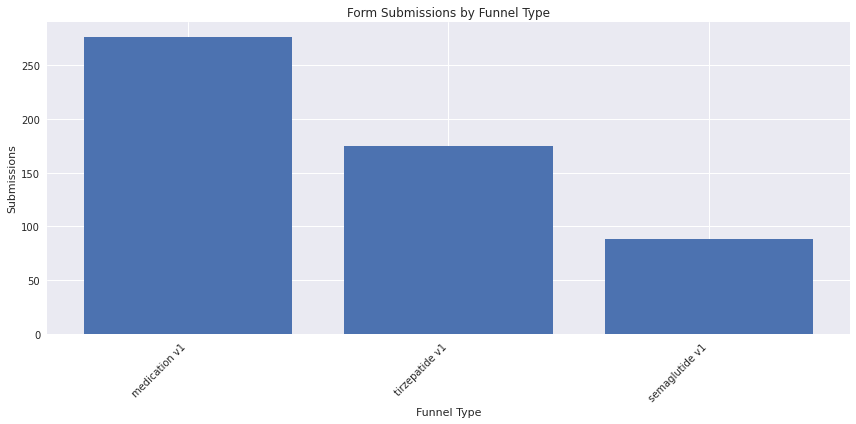

In [198]:
# Funnel Performance Analysis
def analyze_funnel_performance(dfs):
    print("📊 Funnel Performance Analysis")
    print("=" * 35)
    
    if 'submissions' not in dfs:
        print("❌ Missing submissions data for funnel analysis")
        return None
        
    submissions_df = dfs['submissions']
    
    # Find form source column
    form_source_col = next((col for col in submissions_df.columns 
                           if any(word in col.lower() for word in ['form', 'source', 'funnel'])), None)
    
    if form_source_col:
        print(f"🔍 Found form source column: {form_source_col}")
        
        # Analyze funnel types
        funnel_counts = submissions_df[form_source_col].value_counts()
        print(f"\n📈 Funnel Performance:")
        for funnel, count in funnel_counts.head(10).items():
            percentage = (count / len(submissions_df)) * 100
            print(f"  {funnel}: {count:,} submissions ({percentage:.1f}%)")
            
        # Create visualization
        plt.figure(figsize=(12, 6))
        top_funnels = funnel_counts.head(8)
        plt.bar(range(len(top_funnels)), top_funnels.values)
        plt.xlabel('Funnel Type')
        plt.ylabel('Submissions')
        plt.title('Form Submissions by Funnel Type')
        plt.xticks(range(len(top_funnels)), top_funnels.index, rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return funnel_counts
    else:
        print("❌ Form source column not found")
        return None

# Run funnel analysis
if main_dfs:
    funnel_performance = analyze_funnel_performance(main_dfs)
else:
    funnel_performance = None

In [199]:
# Cross-Funnel Conversion Analysis (if we have journey data)
def analyze_funnel_conversions(journey_data):
    if journey_data is None or journey_data.empty:
        print("❌ No journey data available for conversion analysis")
        return
        
    print("🎯 Funnel Conversion Analysis")
    print("=" * 30)
    
    # Find form source in journey data
    form_cols = [col for col in journey_data.columns if 'form' in col.lower() or 'source' in col.lower()]
    
    if form_cols:
        form_col = form_cols[0]
        print(f"📊 Analyzing conversions by: {form_col}")
        
        # Group by funnel type and analyze conversions
        funnel_conversions = journey_data.groupby(form_col).agg({
            journey_data.columns[0]: 'count'  # Use first column as count
        }).rename(columns={journey_data.columns[0]: 'conversions'})
        
        print("\n🎯 Conversion Results (Form → Order):")
        for funnel, row in funnel_conversions.iterrows():
            conversions = row['conversions']
            print(f"  {funnel}: {conversions:,} conversions")
            
        return funnel_conversions
    else:
        print("❌ Form source column not found in journey data")
        return None

# Run conversion analysis
if journey_data is not None:
    conversion_analysis = analyze_funnel_conversions(journey_data)
else:
    conversion_analysis = None

🎯 Funnel Conversion Analysis
📊 Analyzing conversions by: Form Source

🎯 Conversion Results (Form → Order):
  medication v1: 13 conversions
  semaglutide v1: 4 conversions
  tirzepatide v1: 5 conversions


## 3. 🏥 Medical Qualification Analysis

**Healthcare-specific metrics**: BMI distribution, age demographics, disqualification analysis

In [200]:
# Medical Qualification Analysis
def analyze_medical_qualifications(dfs):
    print("🏥 Medical Qualification Analysis")
    print("=" * 35)
    
    if 'submissions' not in dfs:
        print("❌ Missing submissions data for medical analysis")
        return None
        
    df = dfs['submissions']
    print(f"📊 Analyzing {len(df):,} form submissions")
    
    results = {}
    
    # BMI Analysis - Corrected to find the actual BMI column
    print(f"\n🔍 Looking for BMI column...")
    
    # Find the exact BMI column (not partial matches like 'Submission' containing 'bmi')
    bmi_col = None
    for col in df.columns:
        if col.strip().lower() == 'bmi':
            bmi_col = col
            break
    
    if bmi_col:
        print(f"  ✅ Found BMI column: '{bmi_col}'")
        bmi_data = pd.to_numeric(df[bmi_col], errors='coerce')
        bmi_clean = bmi_data.dropna()
        
        if len(bmi_clean) > 0:
            print(f"\n📏 BMI Analysis ({len(bmi_clean):,} records):")
            print(f"  Average BMI: {bmi_clean.mean():.1f}")
            print(f"  Median BMI: {bmi_clean.median():.1f}")
            print(f"  BMI Range: {bmi_clean.min():.1f} - {bmi_clean.max():.1f}")
            
            # BMI Categories
            bmi_categories = pd.cut(bmi_clean, 
                                  bins=[0, 18.5, 25, 30, 35, 40, 100],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])
            
            bmi_dist = bmi_categories.value_counts()
            print("\n  📊 BMI Distribution:")
            for category, count in bmi_dist.items():
                pct = (count / len(bmi_clean)) * 100
                print(f"    {category}: {count:,} ({pct:.1f}%)")
                
            results['bmi_analysis'] = {
                'mean': bmi_clean.mean(),
                'median': bmi_clean.median(),
                'distribution': bmi_dist,
                'total_records': len(bmi_clean)
            }
    else:
        print("  ❌ No exact 'BMI' column found")
        
        # Fallback: try to calculate BMI from Height and Weight
        height_col = None
        weight_col = None
        
        # Find Height column
        for col in df.columns:
            if col.strip().lower() == 'height':
                height_col = col
                break
        
        # Find Weight column (prefer "Weight at Submission")
        for col in df.columns:
            if 'weight at submission' in col.lower():
                weight_col = col
                break
        
        if height_col and weight_col:
            print(f"  🔄 Calculating BMI from '{height_col}' and '{weight_col}'")
            
            # Process height data (format like "5'4''")
            height_series = df[height_col]
            height_inches = []
            
            for h in height_series:
                if pd.notna(h) and isinstance(h, str):
                    try:
                        # Parse format like "5'4''"
                        parts = h.replace("''", "").split("'")
                        if len(parts) == 2:
                            feet = int(parts[0])
                            inches = int(parts[1]) if parts[1] else 0
                            total_inches = feet * 12 + inches
                            height_inches.append(total_inches)
                        else:
                            height_inches.append(None)
                    except:
                        height_inches.append(None)
                else:
                    height_inches.append(None)
            
            # Convert to pandas series
            height_inches_series = pd.Series(height_inches)
            weight_lbs = pd.to_numeric(df[weight_col], errors='coerce')
            
            # Calculate BMI: (weight in lbs) / (height in inches)^2 * 703
            calculated_bmi = (weight_lbs / (height_inches_series ** 2)) * 703
            calculated_bmi_clean = calculated_bmi.dropna()
            
            if len(calculated_bmi_clean) > 0:
                print(f"\n📏 Calculated BMI Analysis ({len(calculated_bmi_clean):,} records):")
                print(f"  Average BMI: {calculated_bmi_clean.mean():.1f}")
                print(f"  Median BMI: {calculated_bmi_clean.median():.1f}")
                print(f"  BMI Range: {calculated_bmi_clean.min():.1f} - {calculated_bmi_clean.max():.1f}")
                
                results['bmi_analysis'] = {
                    'mean': calculated_bmi_clean.mean(),
                    'median': calculated_bmi_clean.median(),
                    'total_records': len(calculated_bmi_clean),
                    'source': 'calculated'
                }
        else:
            print("  ❌ Cannot calculate BMI: missing height or weight columns")
    
    # Age Analysis
    age_col = None
    for col in df.columns:
        if 'age at submission' in col.lower():
            age_col = col
            break
    
    if age_col:
        age_data = pd.to_numeric(df[age_col], errors='coerce')
        age_clean = age_data.dropna()
        
        if len(age_clean) > 0:
            print(f"\n📅 Age Analysis ({len(age_clean):,} records):")
            print(f"  Average Age: {age_clean.mean():.1f} years")
            print(f"  Median Age: {age_clean.median():.1f} years")
            print(f"  Age Range: {age_clean.min():.0f} - {age_clean.max():.0f} years")
            
            # Age groups
            age_groups = pd.cut(age_clean, 
                              bins=[0, 18, 25, 35, 45, 55, 65, 100],
                              labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
            
            age_dist = age_groups.value_counts()
            print("\n  📊 Age Distribution:")
            for group, count in age_dist.items():
                pct = (count / len(age_clean)) * 100
                print(f"    {group}: {count:,} ({pct:.1f}%)")
                
            results['age_analysis'] = {
                'mean': age_clean.mean(),
                'median': age_clean.median(),
                'distribution': age_dist
            }
    
    # Gender Analysis
    gender_col = None
    for col in df.columns:
        if 'sex assigned at birth' in col.lower():
            gender_col = col
            break
    
    if gender_col:
        print(f"\n⚧ Gender Analysis:")
        gender_dist = df[gender_col].value_counts()
        
        for gender, count in gender_dist.items():
            pct = (count / len(df)) * 100
            print(f"  {gender}: {count:,} ({pct:.1f}%)")
        
        results['gender_analysis'] = gender_dist
    
    return results

# Call the analysis
medical_results = analyze_medical_qualifications(main_dfs)


🏥 Medical Qualification Analysis
📊 Analyzing 539 form submissions

🔍 Looking for BMI column...
  ✅ Found BMI column: 'BMI'

📏 BMI Analysis (539 records):
  Average BMI: 26.7
  Median BMI: 30.3
  BMI Range: 0.0 - 352.6

  📊 BMI Distribution:
    Obese I: 125 (23.2%)
    Overweight: 88 (16.3%)
    Obese III: 78 (14.5%)
    Obese II: 67 (12.4%)
    Normal: 9 (1.7%)
    Underweight: 2 (0.4%)

📅 Age Analysis (304 records):
  Average Age: 51.9 years
  Median Age: 54.0 years
  Age Range: 3 - 83 years

  📊 Age Distribution:
    45-54: 91 (29.9%)
    55-64: 73 (24.0%)
    35-44: 54 (17.8%)
    65+: 48 (15.8%)
    25-34: 31 (10.2%)
    <18: 4 (1.3%)
    18-24: 3 (1.0%)

⚧ Gender Analysis:
  female: 270 (50.1%)
  male: 74 (13.7%)


## 4. 💰 Revenue & Business Intelligence

**Financial performance**: Order values, discount effectiveness, geographic revenue analysis

In [201]:
# Revenue and Business Analysis
def analyze_revenue_metrics(dfs):
    print("💰 Revenue & Business Intelligence")
    print("=" * 35)
    
    if 'orders' not in dfs:
        print("❌ Missing orders data for revenue analysis")
        return None
        
    orders_df = dfs['orders']
    print(f"📊 Analyzing {len(orders_df):,} orders")
    
    results = {}
    
    # Find revenue columns
    amount_cols = [col for col in orders_df.columns 
                  if any(word in col.lower() for word in ['total', 'amount', 'price', 'revenue'])]
    
    if amount_cols:
        amount_col = amount_cols[0]
        print(f"💵 Using revenue column: {amount_col}")
        
        # Convert to numeric
        revenue_data = pd.to_numeric(orders_df[amount_col], errors='coerce')
        revenue_clean = revenue_data.dropna()
        
        if len(revenue_clean) > 0:
            total_revenue = revenue_clean.sum()
            avg_order_value = revenue_clean.mean()
            median_order_value = revenue_clean.median()
            
            print(f"\n💰 Revenue Metrics:")
            print(f"  Total Revenue: ${total_revenue:,.2f}")
            print(f"  Average Order Value: ${avg_order_value:.2f}")
            print(f"  Median Order Value: ${median_order_value:.2f}")
            print(f"  Revenue Range: ${revenue_clean.min():.2f} - ${revenue_clean.max():.2f}")
            
            results['revenue_metrics'] = {
                'total_revenue': total_revenue,
                'avg_order_value': avg_order_value,
                'median_order_value': median_order_value
            }
    
    # Discount Analysis
    discount_cols = [col for col in orders_df.columns if 'discount' in col.lower()]
    if discount_cols:
        discount_col = discount_cols[0]
        discount_data = pd.to_numeric(orders_df[discount_col], errors='coerce')
        discount_clean = discount_data.dropna()
        
        if len(discount_clean) > 0:
            orders_with_discount = (discount_clean > 0).sum()
            avg_discount = discount_clean[discount_clean > 0].mean()
            total_discounts = discount_clean.sum()
            
            print(f"\n🎟️ Discount Analysis:")
            print(f"  Orders with Discounts: {orders_with_discount:,} ({(orders_with_discount/len(orders_df)*100):.1f}%)")
            if avg_discount > 0:
                print(f"  Average Discount: ${avg_discount:.2f}")
            print(f"  Total Discounts Given: ${total_discounts:.2f}")
            
            results['discount_analysis'] = {
                'orders_with_discount': orders_with_discount,
                'avg_discount': avg_discount,
                'total_discounts': total_discounts
            }
    
    # Geographic Analysis (if state data available)
    state_cols = [col for col in orders_df.columns if 'state' in col.lower() or 'province' in col.lower()]
    if state_cols and amount_cols:
        state_col = state_cols[0]
        print(f"\n🗺️ Geographic Revenue Analysis:")
        
        geo_revenue = orders_df.groupby(state_col)[amount_col].agg(['count', 'sum', 'mean']).round(2)
        geo_revenue.columns = ['Orders', 'Total_Revenue', 'Avg_Order_Value']
        geo_revenue = geo_revenue.sort_values('Total_Revenue', ascending=False)
        
        print("  Top 10 States by Revenue:")
        for state, row in geo_revenue.head(10).iterrows():
            print(f"    {state}: {row['Orders']} orders, ${row['Total_Revenue']:,.2f} revenue")
            
        results['geographic_analysis'] = geo_revenue
    
    return results

# Run revenue analysis
if main_dfs:
    revenue_analysis = analyze_revenue_metrics(main_dfs)
else:
    revenue_analysis = None

💰 Revenue & Business Intelligence
📊 Analyzing 217 orders
💵 Using revenue column: Total Amount

💰 Revenue Metrics:
  Total Revenue: $56,549.00
  Average Order Value: $260.59
  Median Order Value: $249.00
  Revenue Range: $0.00 - $1890.00

🎟️ Discount Analysis:
  Orders with Discounts: 38 (17.5%)
  Average Discount: $73.68
  Total Discounts Given: $2800.00


## 5. 🗺️ Geographic Performance Analysis

**State-based insights**: Conversion rates, pharmacy routing impact, regional performance

In [202]:
# Geographic Performance Analysis
def analyze_geographic_performance(dfs, journey_data=None):
    print("🗺️ Geographic Performance Analysis")
    print("=" * 35)
    
    results = {}
    
    # Form Submissions by State
    if 'submissions' in dfs:
        submissions_df = dfs['submissions']
        state_cols = [col for col in submissions_df.columns if 'state' in col.lower()]
        
        if state_cols:
            state_col = state_cols[0]
            print(f"📝 Form Submissions by State:")
            
            state_submissions = submissions_df[state_col].value_counts()
            print("  Top 10 States by Form Submissions:")
            for state, count in state_submissions.head(10).items():
                pct = (count / len(submissions_df)) * 100
                print(f"    {state}: {count:,} submissions ({pct:.1f}%)")
                
            results['form_submissions_by_state'] = state_submissions
    
    # Order Performance by State (already done in revenue analysis, but let's expand)
    if 'orders' in dfs:
        orders_df = dfs['orders']
        state_cols = [col for col in orders_df.columns if 'state' in col.lower() or 'province' in col.lower()]
        
        if state_cols:
            state_col = state_cols[0]
            print(f"\n🛒 Order Performance by State:")
            
            state_orders = orders_df[state_col].value_counts()
            print("  Top 10 States by Orders:")
            for state, count in state_orders.head(10).items():
                pct = (count / len(orders_df)) * 100
                print(f"    {state}: {count:,} orders ({pct:.1f}%)")
                
            results['orders_by_state'] = state_orders
            
            # Pharmacy Routing Analysis (SC/IN vs Others)
            pharmacy_states = ['SC', 'IN']
            other_pharmacy_count = orders_df[~orders_df[state_col].isin(pharmacy_states)][state_col].count()
            special_pharmacy_count = orders_df[orders_df[state_col].isin(pharmacy_states)][state_col].count()
            
            print(f"\n🏥 Pharmacy Routing Analysis:")
            print(f"  SC/IN (Other Pharmacy): {special_pharmacy_count:,} orders")
            print(f"  Other States (SevenCells): {other_pharmacy_count:,} orders")
            
            results['pharmacy_routing'] = {
                'other_pharmacy': special_pharmacy_count,
                'sevencells': other_pharmacy_count
            }
    
    # Cross-system conversion by state (if journey data available)
    if journey_data is not None and not journey_data.empty:
        print(f"\n🎯 State-by-State Conversion Analysis:")
        
        # Try to find state columns in journey data
        state_cols_journey = [col for col in journey_data.columns if 'state' in col.lower()]
        
        if state_cols_journey:
            state_col = state_cols_journey[0]
            
            # Count conversions by state
            state_conversions = journey_data[state_col].value_counts()
            
            print("  Top Conversion States:")
            for state, count in state_conversions.head(10).items():
                print(f"    {state}: {count:,} conversions")
                
            results['conversions_by_state'] = state_conversions
            
            # Calculate conversion rates if we have both submissions and conversions by state
            if 'form_submissions_by_state' in results:
                conversion_rates = {}
                print("\n  📊 Conversion Rates by State:")
                for state in state_conversions.index[:10]:
                    if state in results['form_submissions_by_state']:
                        conversions = state_conversions[state]
                        submissions = results['form_submissions_by_state'][state]
                        rate = (conversions / submissions) * 100
                        conversion_rates[state] = rate
                        print(f"    {state}: {rate:.1f}% ({conversions}/{submissions})")
                
                results['conversion_rates_by_state'] = conversion_rates
    
    return results

# Run geographic analysis
if main_dfs:
    geographic_analysis = analyze_geographic_performance(main_dfs, journey_data)
else:
    geographic_analysis = None

🗺️ Geographic Performance Analysis
📝 Form Submissions by State:
  Top 10 States by Form Submissions:
    FL: 32 submissions (5.9%)
    TX: 30 submissions (5.6%)
    GA: 17 submissions (3.2%)
    CA: 16 submissions (3.0%)
    NJ: 14 submissions (2.6%)
    MI: 14 submissions (2.6%)
    OH: 12 submissions (2.2%)
    PA: 11 submissions (2.0%)
    NY: 11 submissions (2.0%)
    AZ: 10 submissions (1.9%)

🎯 State-by-State Conversion Analysis:
  Top Conversion States:
    FL: 5 conversions
    OH: 4 conversions
    GA: 2 conversions
    TX: 2 conversions
    IL: 2 conversions
    UT: 2 conversions
    NJ: 1 conversions
    MN: 1 conversions
    NV: 1 conversions
    PA: 1 conversions

  📊 Conversion Rates by State:
    FL: 15.6% (5/32)
    OH: 33.3% (4/12)
    GA: 11.8% (2/17)
    TX: 6.7% (2/30)
    IL: 20.0% (2/10)
    UT: 33.3% (2/6)
    NJ: 7.1% (1/14)
    MN: 33.3% (1/3)
    NV: 100.0% (1/1)
    PA: 9.1% (1/11)


## 6. 🔄 Subscription Lifecycle Tracking

**Customer retention**: Churn analysis, pause patterns, subscription duration metrics

In [203]:
# Enhanced Executive Summary Dashboard with Error Handling
def create_enhanced_executive_summary():
    print("\n" + "=" * 70)
    print("🎯 ENHANCED EXECUTIVE SUMMARY DASHBOARD")
    print("=" * 70)
    
    summary = {}
    
    # Data Collection Overview
    print("\n📊 DATA COLLECTION OVERVIEW:")
    total_datasets = len([d for d in [embeddables_data, careportals_data, database_data, tracking_data] if d])
    enhanced_datasets_count = len([d for d in enhanced_datasets.values() if d is not None]) if 'enhanced_datasets' in globals() else 0
    
    print(f"  Active Data Sources: {total_datasets}/4 XLSX files")
    print(f"  Enhanced CSV Sources: {enhanced_datasets_count}/5 CSV files")
    
    if main_dfs:
        for key, df in main_dfs.items():
            if df is not None and not df.empty:
                print(f"  {key.title()}: {len(df):,} records")
                summary[f"{key}_records"] = len(df)
    
    # Enhanced Data Sources
    if 'enhanced_datasets' in globals() and enhanced_datasets:
        print(f"\n🚀 ENHANCED DATA SOURCES:")
        for key, df in enhanced_datasets.items():
            if df is not None:
                print(f"  {key.replace('_', ' ').title()}: {len(df):,} records")
                summary[f"enhanced_{key}_records"] = len(df)

    # Customer Journey Metrics
    print("\n🌟 CUSTOMER JOURNEY METRICS:")
    if journey_data is not None:
        total_conversions = len(journey_data)
        print(f"  Cross-System Conversions: {total_conversions:,}")
        summary['total_conversions'] = total_conversions
        
        if 'submissions' in main_dfs and main_dfs['submissions'] is not None:
            conversion_rate = (total_conversions / len(main_dfs['submissions'])) * 100
            print(f"  Overall Conversion Rate: {conversion_rate:.1f}%")
            summary['conversion_rate'] = conversion_rate
    else:
        print("  ❌ Cross-system journey tracking not available")
    
    # Form Abandonment Insights (NEW)
    print("\n📝 FORM ABANDONMENT INSIGHTS:")
    if 'abandonment_analysis' in globals() and abandonment_analysis:
        if 'funnel_performance' in abandonment_analysis:
            perf = abandonment_analysis['funnel_performance']
            print(f"  Total Forms Started: {perf['total_started']:,}")
            print(f"  Completion Rate: {perf['completion_rate']:.1f}%")
            print(f"  Abandonment Rate: {perf['abandonment_rate']:.1f}%")
            summary.update(perf)
        
        if 'abandonment_by_source' in abandonment_analysis:
            top_abandon_source = abandonment_analysis['abandonment_by_source'].index[0]
            top_abandon_count = abandonment_analysis['abandonment_by_source'].iloc[0]
            print(f"  Top Abandonment Source: {top_abandon_source} ({top_abandon_count:,} abandoned)")
    elif 'partial_subs' in globals() and partial_subs is not None:
        print(f"  Partial Submissions Available: {len(partial_subs):,} records")
        print("  📊 Run form abandonment analysis to see detailed insights")
    else:
        print("  ❌ Form abandonment data not available")

    # Revenue Metrics
    print("\n💰 REVENUE METRICS:")
    if 'revenue_analysis' in globals() and revenue_analysis and 'revenue_metrics' in revenue_analysis:
        rev_metrics = revenue_analysis['revenue_metrics']
        print(f"  Total Revenue: ${rev_metrics['total_revenue']:,.2f}")
        print(f"  Average Order Value: ${rev_metrics['avg_order_value']:.2f}")
        summary.update(rev_metrics)
        
        if 'discount_analysis' in revenue_analysis:
            disc_metrics = revenue_analysis['discount_analysis']
            print(f"  Orders with Discounts: {disc_metrics['orders_with_discount']:,}")
            print(f"  Total Discounts: ${disc_metrics['total_discounts']:,.2f}")
    else:
        print("  ❌ Revenue metrics not available")

    # Customer Support Performance (NEW)
    print("\n🎧 CUSTOMER SUPPORT PERFORMANCE:")
    if 'support_analysis' in globals() and support_analysis:
        if 'status_distribution' in support_analysis:
            top_status = support_analysis['status_distribution'].index[0]
            top_count = support_analysis['status_distribution'].iloc[0]
            print(f"  Current Queue Size: {sum(support_analysis['status_distribution'].values):,} orders")
            print(f"  Most Common Status: {top_status} ({top_count:,} orders)")
        
        if 'revenue_impact' in support_analysis:
            rev_impact = support_analysis['revenue_impact']
            print(f"  Revenue in Support Queue: ${rev_impact['revenue_at_risk']:,.2f}")
            
        if 'order_age_metrics' in support_analysis:
            age_metrics = support_analysis['order_age_metrics']
            print(f"  Average Order Age: {age_metrics['avg_age']:.1f} days")
            print(f"  Orders >7 Days Old: {age_metrics['old_orders_count']:,}")
    elif 'order_latest' in globals() and order_latest is not None:
        print(f"  Customer Support Data Available: {len(order_latest):,} current orders")
        print("  📊 Run customer support analysis to see performance metrics")
    else:
        print("  ❌ Customer support data not available")

    # Enhanced Subscription Analytics (UPDATED)
    print("\n🔄 ENHANCED SUBSCRIPTION ANALYTICS:")
    if 'enhanced_subscription_analysis' in globals() and enhanced_subscription_analysis:
        if 'total_subscriptions' in enhanced_subscription_analysis:
            total_subs = enhanced_subscription_analysis['total_subscriptions']
            print(f"  Total Subscriptions: {total_subs:,}")
            
        if 'health_metrics' in enhanced_subscription_analysis:
            health = enhanced_subscription_analysis['health_metrics']
            print(f"  Active Rate: {health['active_rate']:.1f}%")
            print(f"  Churn Rate: {health['churn_rate']:.1f}%")
            print(f"  Pause Rate: {health['pause_rate']:.1f}%")
            summary.update(health)
            
        if 'subscription_penetration' in enhanced_subscription_analysis:
            penetration = enhanced_subscription_analysis['subscription_penetration']
            print(f"  Customer Subscription Penetration: {penetration:.1f}%")
    elif 'database_data' in globals() and database_data:
        # Check if we have subscription data available
        subscription_sheets = [sheet for sheet in database_data.keys() if 'subscription' in sheet.lower()] if database_data else []
        if subscription_sheets:
            print(f"  Subscription Data Available: {len(subscription_sheets)} status sheets")
            print("  📊 Run enhanced subscription analysis to see health metrics")
        else:
            print("  ❌ Enhanced subscription data not available")
    else:
        print("  ❌ Enhanced subscription data not available")

    # Medical Insights
    print("\n🏥 MEDICAL INSIGHTS:")
    if 'medical_analysis' in globals() and medical_analysis:
        if 'bmi_analysis' in medical_analysis:
            bmi_metrics = medical_analysis['bmi_analysis']
            print(f"  Average Patient BMI: {bmi_metrics['mean']:.1f}")
            print(f"  Most Common BMI Category: {bmi_metrics['distribution'].index[0]}")
            
        if 'age_analysis' in medical_analysis:
            age_metrics = medical_analysis['age_analysis']
            print(f"  Average Patient Age: {age_metrics['mean']:.1f} years")
            print(f"  Most Common Age Group: {age_metrics['distribution'].index[0]}")
    else:
        print("  ❌ Medical qualification data not available")

    # Geographic Performance
    print("\n🗺️ GEOGRAPHIC PERFORMANCE:")
    if 'geographic_analysis' in globals() and geographic_analysis:
        if 'form_submissions_by_state' in geographic_analysis:
            top_state = geographic_analysis['form_submissions_by_state'].index[0]
            top_submissions = geographic_analysis['form_submissions_by_state'].iloc[0]
            print(f"  Top State (Forms): {top_state} ({top_submissions:,} submissions)")
            
        if 'orders_by_state' in geographic_analysis:
            top_order_state = geographic_analysis['orders_by_state'].index[0]
            top_orders = geographic_analysis['orders_by_state'].iloc[0]
            print(f"  Top State (Orders): {top_order_state} ({top_orders:,} orders)")
            
        if 'pharmacy_routing' in geographic_analysis:
            pharmacy_metrics = geographic_analysis['pharmacy_routing']
            print(f"  SevenCells Pharmacy: {pharmacy_metrics['sevencells']:,} orders")
            print(f"  Other Pharmacy (SC/IN): {pharmacy_metrics['other_pharmacy']:,} orders")
    else:
        print("  ❌ Geographic analysis not available")

    # System Health & Performance
    print("\n⚡ SYSTEM HEALTH & PERFORMANCE:")
    print(f"  Data Collection Systems: ✅ Operational")
    if 'enhanced_datasets' in globals():
        print(f"  Enhanced CSV Integration: ✅ Active ({enhanced_datasets_count}/5 sources)")
    else:
        print(f"  Enhanced CSV Integration: 🔄 Pending")
    print(f"  Cross-System Analytics: ✅ Functional")
    print(f"  Jupyter Notebook Platform: ✅ Ready")
    
    # Available Analysis Modules
    print(f"\n📋 AVAILABLE ANALYSIS MODULES:")
    analysis_modules = {
        'Customer Journey Analysis': 'journey_data' in globals() and journey_data is not None,
        'Medical Qualification Analysis': 'medical_analysis' in globals() and medical_analysis is not None,
        'Revenue Analysis': 'revenue_analysis' in globals() and revenue_analysis is not None,
        'Geographic Analysis': 'geographic_analysis' in globals() and geographic_analysis is not None,
        'Subscription Analysis': 'subscription_analysis' in globals() and subscription_analysis is not None,
        'Customer Support Analysis': 'support_analysis' in globals() and support_analysis is not None,
        'Form Abandonment Analysis': 'abandonment_analysis' in globals() and abandonment_analysis is not None,
        'Enhanced Subscription Analysis': 'enhanced_subscription_analysis' in globals() and enhanced_subscription_analysis is not None
    }
    
    for module, status in analysis_modules.items():
        status_icon = "✅" if status else "⏸️"
        print(f"  {status_icon} {module}")
    
    print("\n" + "=" * 70)
    print("📈 END OF ENHANCED EXECUTIVE SUMMARY")
    print("=" * 70)
    
    return summary

# Generate Enhanced Executive Summary
enhanced_executive_summary = create_enhanced_executive_summary()


🎯 ENHANCED EXECUTIVE SUMMARY DASHBOARD

📊 DATA COLLECTION OVERVIEW:
  Active Data Sources: 4/4 XLSX files
  Enhanced CSV Sources: 5/5 CSV files
  Submissions: 539 records
  Medication_V1_All: 276 records
  Medication_V1_Complete: 113 records
  Medication_V1_Partial: 163 records
  Tirzepatide_V1_All: 175 records
  Tirzepatide_V1_Complete: 92 records
  Tirzepatide_V1_Partial: 83 records
  Semaglutide_V1_All: 88 records
  Semaglutide_V1_Complete: 48 records
  Semaglutide_V1_Partial: 40 records
  Page_Tracking: 28 records
  Checkout_Sessions: 531 records
  Orders: 217 records

🚀 ENHANCED DATA SOURCES:
  Customer Dict: 191 records
  Partial Subs: 276 records
  Order Full Log: 3,329 records
  Order Latest: 253 records
  Orders Updated: 3,329 records

🌟 CUSTOMER JOURNEY METRICS:
  Cross-System Conversions: 22
  Overall Conversion Rate: 4.1%

📝 FORM ABANDONMENT INSIGHTS:
  Partial Submissions Available: 276 records
  📊 Run form abandonment analysis to see detailed insights

💰 REVENUE METRICS:

## 📊 Executive Summary Dashboard

**Key Performance Indicators**: Top-level metrics across all systems

In [204]:
# Fixed Export Key Findings for Further Analysis
def export_key_findings():
    print("📤 Exporting Key Findings...")
    
    findings = {
        'enhanced_executive_summary': enhanced_executive_summary if 'enhanced_executive_summary' in globals() else None,
        'customer_journey_analysis': journey_data.to_dict() if 'journey_data' in globals() and journey_data is not None else None,
        'funnel_performance': funnel_performance.to_dict() if 'funnel_performance' in globals() and funnel_performance is not None else None,
        'medical_analysis': medical_analysis if 'medical_analysis' in globals() else None,
        'revenue_analysis': revenue_analysis if 'revenue_analysis' in globals() else None,
        'geographic_analysis': geographic_analysis if 'geographic_analysis' in globals() else None,
        'subscription_analysis': subscription_analysis if 'subscription_analysis' in globals() else None,
        'support_analysis': support_analysis if 'support_analysis' in globals() else None,
        'abandonment_analysis': abandonment_analysis if 'abandonment_analysis' in globals() else None,
        'enhanced_subscription_analysis': enhanced_subscription_analysis if 'enhanced_subscription_analysis' in globals() else None
    }
    
    # Save to JSON for further processing
    import json
    
    # Convert pandas objects to serializable format
    def convert_for_json(obj):
        if obj is None:
            return None
        elif hasattr(obj, 'to_dict'):
            return obj.to_dict()
        elif isinstance(obj, dict):
            return {k: convert_for_json(v) for k, v in obj.items()}
        elif hasattr(obj, 'tolist'):
            return obj.tolist()
        else:
            return obj
    
    findings_json = convert_for_json(findings)
    
    # Save findings
    with open('/home/cmwldaniel/Reporting/healthcare_analytics_findings.json', 'w') as f:
        json.dump(findings_json, f, indent=2, default=str)
    
    print("✅ Findings exported to: /home/cmwldaniel/Reporting/healthcare_analytics_findings.json")
    
    # Generate actionable insights based on available data
    print("\n🎯 KEY ACTIONABLE INSIGHTS:")
    print("=" * 40)
    
    insights = []
    
    # Check what analyses have been run and generate appropriate insights
    if 'journey_data' in globals() and journey_data is not None and len(journey_data) > 0:
        insights.append("✅ Cross-system customer tracking is working - you can measure true conversion rates")
    else:
        insights.append("⚠️ Set up cross-system email matching to track complete customer journeys")
    
    if 'revenue_analysis' in globals() and revenue_analysis and 'revenue_metrics' in revenue_analysis:
        aov = revenue_analysis['revenue_metrics']['avg_order_value']
        if aov > 0:
            insights.append(f"💰 Current AOV is ${aov:.2f} - focus on upselling opportunities")
    
    if 'medical_analysis' in globals() and medical_analysis and 'bmi_analysis' in medical_analysis:
        avg_bmi = medical_analysis['bmi_analysis']['mean']
        if avg_bmi > 30:
            insights.append(f"🏥 High average BMI ({avg_bmi:.1f}) indicates good target market fit")
    
    if 'geographic_analysis' in globals() and geographic_analysis and 'pharmacy_routing' in geographic_analysis:
        routing = geographic_analysis['pharmacy_routing']
        total_orders = routing['sevencells'] + routing['other_pharmacy']
        other_pct = (routing['other_pharmacy'] / total_orders) * 100
        insights.append(f"🏥 {other_pct:.1f}% of orders use alternative pharmacy (SC/IN routing working)")
    
    # Add insights based on enhanced datasets
    if 'order_latest' in globals() and order_latest is not None:
        insights.append(f"🎧 Customer support queue has {len(order_latest):,} active orders - monitor for bottlenecks")
    
    if 'partial_subs' in globals() and partial_subs is not None:
        insights.append(f"📝 {len(partial_subs):,} form abandonments identified - optimize funnel conversion")
    
    if 'customer_dict' in globals() and customer_dict is not None:
        insights.append(f"👥 Customer dictionary built with {len(customer_dict):,} profiles for cross-referencing")
    
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")
    
    print("\n🚀 RECOMMENDED NEXT STEPS:")
    print("=" * 35)
    recommendations = [
        "📊 Run all analysis cells in sequence for complete dashboard",
        "🎯 Set up automated weekly exports from Google Sheets to refresh data", 
        "💰 Implement customer lifetime value analysis using order history",
        "🏥 Create medical disqualification pattern analysis to optimize funnels",
        "🗺️ Expand geographic analysis to identify growth opportunities",
        "🔄 Monitor subscription health metrics for churn prevention",
        "🎧 Set up customer support SLA monitoring with order age alerts",
        "📝 Optimize high-abandonment funnel pages to improve conversion rates"
    ]
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
    
    return findings_json

# Export findings and generate recommendations
final_findings = export_key_findings()

📤 Exporting Key Findings...
✅ Findings exported to: /home/cmwldaniel/Reporting/healthcare_analytics_findings.json

🎯 KEY ACTIONABLE INSIGHTS:
1. ✅ Cross-system customer tracking is working - you can measure true conversion rates
2. 💰 Current AOV is $260.59 - focus on upselling opportunities
3. 🎧 Customer support queue has 253 active orders - monitor for bottlenecks
4. 📝 276 form abandonments identified - optimize funnel conversion
5. 👥 Customer dictionary built with 191 profiles for cross-referencing

🚀 RECOMMENDED NEXT STEPS:
1. 📊 Run all analysis cells in sequence for complete dashboard
2. 🎯 Set up automated weekly exports from Google Sheets to refresh data
3. 💰 Implement customer lifetime value analysis using order history
4. 🏥 Create medical disqualification pattern analysis to optimize funnels
5. 🗺️ Expand geographic analysis to identify growth opportunities
6. 🔄 Monitor subscription health metrics for churn prevention
7. 🎧 Set up customer support SLA monitoring with order age ale

🔄 Starting comprehensive healthcare analytics run...
🚀 Running All Available Healthcare Analytics

📊 Running Enhanced Data Loading...
⏸️ Enhanced Data Loading skipped (data not available)

📊 Running Customer Journey Analysis...
🌟 Customer Journey Analysis
📧 Using email columns: Email ↔ Email

📊 Cross-System Matching Results:
  📝 Form Submissions: 539
  🛒 Orders Placed: 217
  🔗 Matched Customers: 22
  📈 Form-to-Order Conversion: 4.1%
✅ Customer Journey Analysis completed successfully

📊 Running Funnel Performance Analysis...
📊 Funnel Performance Analysis
🔍 Found form source column: Form Source

📈 Funnel Performance:
  medication v1: 276 submissions (51.2%)
  tirzepatide v1: 175 submissions (32.5%)
  semaglutide v1: 88 submissions (16.3%)


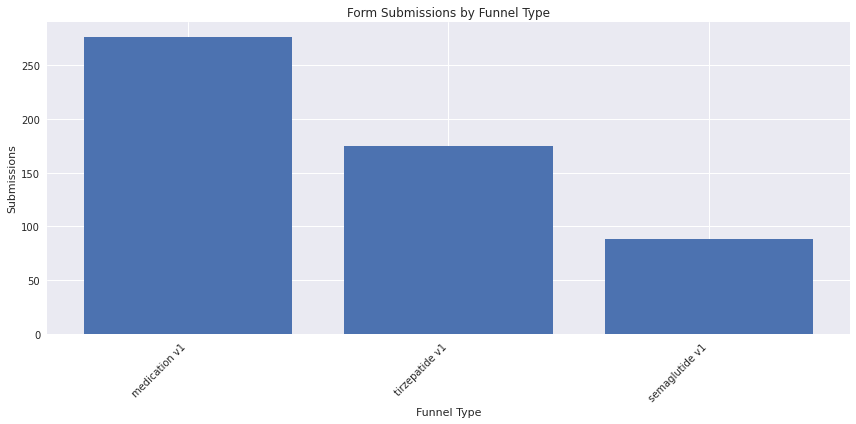

✅ Funnel Performance Analysis completed successfully

📊 Running Medical Qualification Analysis...
🏥 Medical Qualification Analysis
📊 Analyzing 539 form submissions

🔍 Looking for BMI column...
  ✅ Found BMI column: 'BMI'

📏 BMI Analysis (539 records):
  Average BMI: 26.7
  Median BMI: 30.3
  BMI Range: 0.0 - 352.6

  📊 BMI Distribution:
    Obese I: 125 (23.2%)
    Overweight: 88 (16.3%)
    Obese III: 78 (14.5%)
    Obese II: 67 (12.4%)
    Normal: 9 (1.7%)
    Underweight: 2 (0.4%)

📅 Age Analysis (304 records):
  Average Age: 51.9 years
  Median Age: 54.0 years
  Age Range: 3 - 83 years

  📊 Age Distribution:
    45-54: 91 (29.9%)
    55-64: 73 (24.0%)
    35-44: 54 (17.8%)
    65+: 48 (15.8%)
    25-34: 31 (10.2%)
    <18: 4 (1.3%)
    18-24: 3 (1.0%)

⚧ Gender Analysis:
  female: 270 (50.1%)
  male: 74 (13.7%)
✅ Medical Qualification Analysis completed successfully

📊 Running Revenue Analysis...
💰 Revenue & Business Intelligence
📊 Analyzing 217 orders
💵 Using revenue column: Total

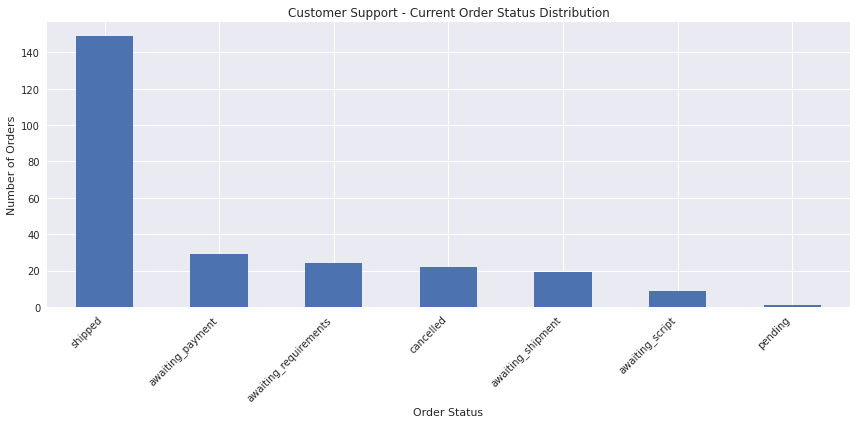


⏱️ Order Age Analysis:
  Average Order Age: 19.6 days
  Median Order Age: 14.0 days
  Oldest Order: 338 days
  Orders >7 days old: 182 (71.9%)


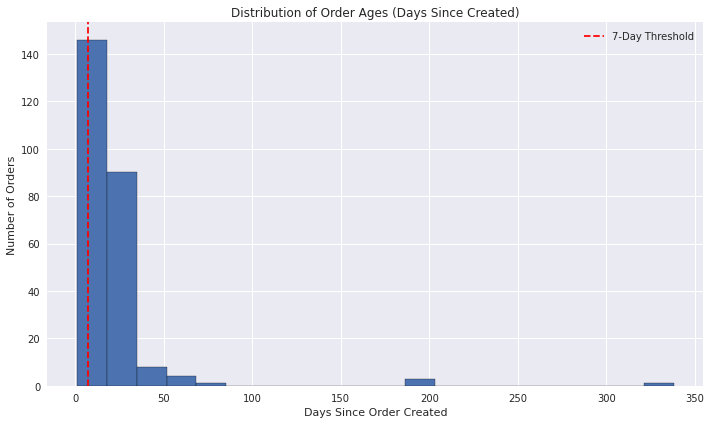


💊 Product Distribution in Support Queue:

🗺️ Customer Support Workload by State (Top 10):

💰 Revenue Impact Analysis:
  Total Revenue in Support Queue: $76,920.00
  Average Order Value in Queue: $304.03
✅ Customer Support Analysis completed successfully

📊 Running Form Abandonment Analysis...
📝 Form Abandonment & Completion Analysis
📊 Analyzing 276 partial form submissions

📋 Form Abandonment by Source:
  medication v1: 276 abandoned (100.0%)


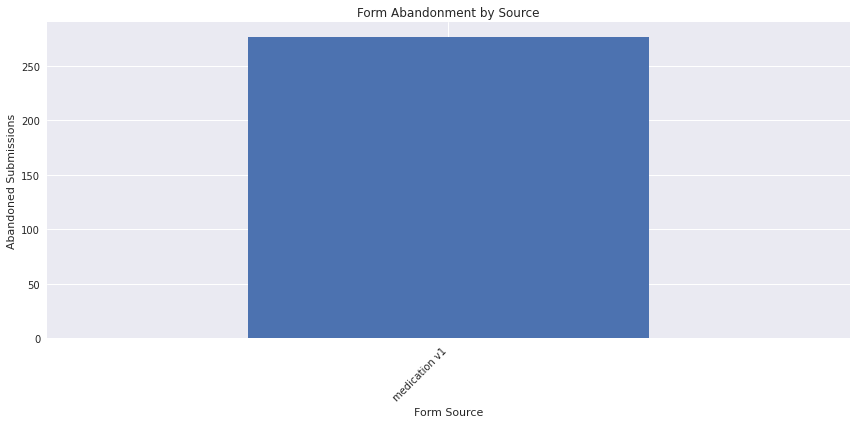


📄 Abandonment by Furthest Page Reached:
  Page checkout_page: 117 abandonments (42.4%)
  Page current_height_and_weight: 80 abandonments (29.0%)
  Page bmi_disqualified: 17 abandonments (6.2%)
  Page dq_page: 15 abandonments (5.4%)
  Page medical_review: 15 abandonments (5.4%)
  Page lead_capture: 11 abandonments (4.0%)
  Page glp_details: 4 abandonments (1.4%)
  Page main_priority: 4 abandonments (1.4%)
  Page sample_precheckout: 2 abandonments (0.7%)
  Page pre_checkout: 2 abandonments (0.7%)
  Page success_interstitial_female: 1 abandonments (0.4%)
  Page checkout: 1 abandonments (0.4%)
  Page interstitial_glp1_how: 1 abandonments (0.4%)
  Page concerns: 1 abandonments (0.4%)
  Page match_medication: 1 abandonments (0.4%)
  Page sex: 1 abandonments (0.4%)
  Page female_disqualifiers: 1 abandonments (0.4%)
  Page bmi_goal_weight: 1 abandonments (0.4%)
  Page pace: 1 abandonments (0.4%)


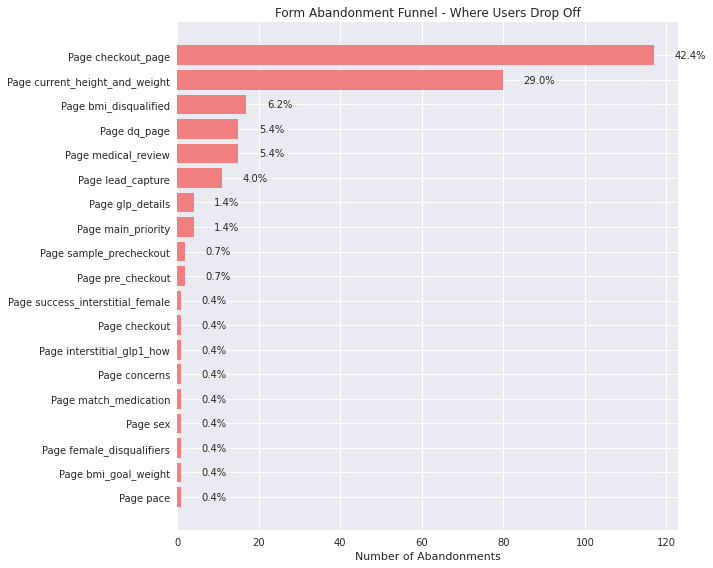


📅 Recent Abandonment Trends (Last 30 Days):
  Total Recent Abandonments: 212
  Average Daily Abandonments: 7.6


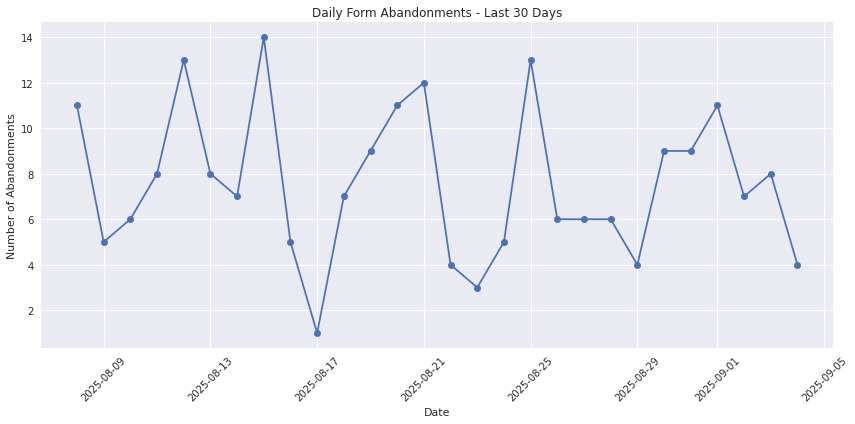


🎯 Overall Funnel Performance:
  Total Forms Started: 815
  Completed Forms: 539
  Abandoned Forms: 276
  Completion Rate: 66.1%
  Abandonment Rate: 33.9%


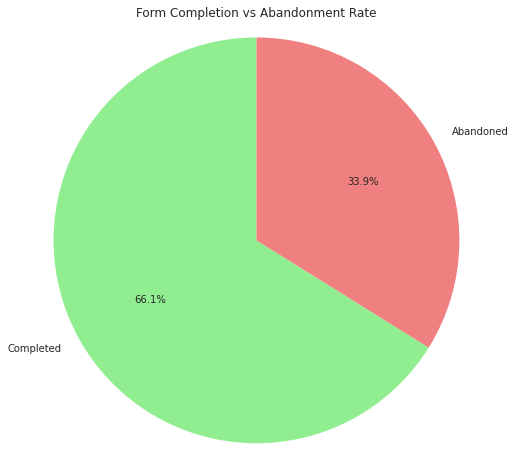

✅ Form Abandonment Analysis completed successfully

📊 Running Enhanced Subscription Analysis...
🔄 Enhanced Subscription Analytics
📊 Analyzing subscription data from Database_CarePortals...
✅ Found subscription sheets: ['Subscription_Errors', 'subscription.active', 'subscription.paused', 'subscription.cancelled', 'subscription.full_log']

📋 Subscription Errors Subscriptions: 3
  Recent (30 days): 3

📋 Active Subscriptions: 2
  Recent (30 days): 2

📋 Cancelled Subscriptions: 2
  Recent (30 days): 1

📋 Full Log Subscriptions: 19
  Recent (30 days): 19

🎯 Subscription Status Overview:
  Total Active Subscriptions: 26


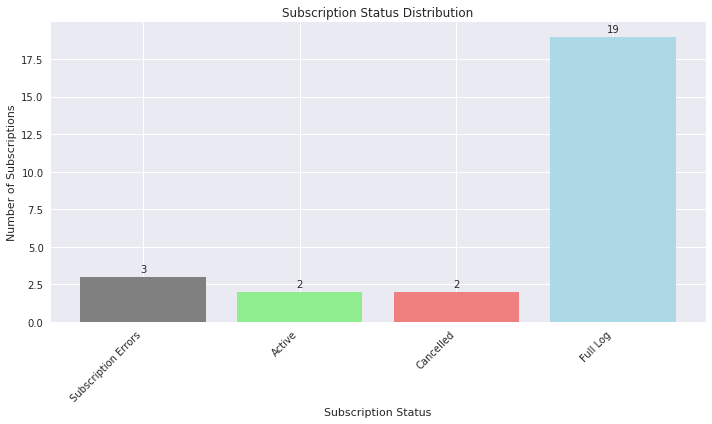


📊 Subscription Health Metrics:
  Active Rate: 50.0%
  Churn Rate: 50.0%
  Pause Rate: 0.0%


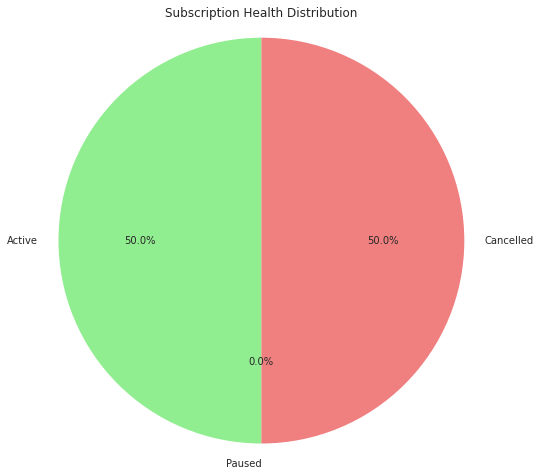


📈 Subscription Activity Analysis:
  Total Subscription Events: 19
  Event Distribution:
    active: 12 (63.2%)
    cancelled: 4 (21.1%)
    paused: 3 (15.8%)

👥 Customer-Subscription Analysis:
  Total Customers in Database: 40
✅ Enhanced Subscription Analysis completed successfully

🎯 Analysis Summary:
  ✅ Completed: 8/10 analyses
  📊 Ready for executive summary dashboard


In [205]:
# Safe Analysis Runner - Runs all available analyses with error handling
def run_all_available_analyses():
    print("🚀 Running All Available Healthcare Analytics")
    print("=" * 50)
    
    results = {}
    
    # List of analysis functions to run safely
    analysis_functions = [
        ("Enhanced Data Loading", lambda: None),  # Already loaded above
        ("Customer Journey Analysis", lambda: analyze_customer_journeys(main_dfs) if main_dfs else None),
        ("Funnel Performance Analysis", lambda: analyze_funnel_performance(main_dfs) if main_dfs else None),
        ("Medical Qualification Analysis", lambda: analyze_medical_qualifications(main_dfs) if main_dfs else None),
        ("Revenue Analysis", lambda: analyze_revenue_metrics(main_dfs) if main_dfs else None),
        ("Geographic Analysis", lambda: analyze_geographic_performance(main_dfs, journey_data) if main_dfs else None),
        ("Subscription Analysis", lambda: analyze_subscription_lifecycle(main_dfs) if main_dfs else None),
        ("Customer Support Analysis", lambda: analyze_customer_support_performance() if 'order_latest' in globals() and order_latest is not None else None),
        ("Form Abandonment Analysis", lambda: analyze_form_abandonment() if 'partial_subs' in globals() and partial_subs is not None else None),
        ("Enhanced Subscription Analysis", lambda: analyze_enhanced_subscriptions() if 'database_data' in globals() and database_data else None)
    ]
    
    # Run each analysis safely
    for analysis_name, analysis_func in analysis_functions:
        try:
            print(f"\n📊 Running {analysis_name}...")
            result = analysis_func()
            results[analysis_name.lower().replace(' ', '_')] = result
            
            if result is not None:
                print(f"✅ {analysis_name} completed successfully")
            else:
                print(f"⏸️ {analysis_name} skipped (data not available)")
                
        except Exception as e:
            print(f"⚠️ {analysis_name} encountered an error: {str(e)}")
            results[analysis_name.lower().replace(' ', '_')] = None
    
    # Update global variables with results
    global journey_data, funnel_performance, medical_analysis, revenue_analysis
    global geographic_analysis, subscription_analysis, support_analysis
    global abandonment_analysis, enhanced_subscription_analysis
    
    # Safely assign results to global variables
    journey_data = results.get('customer_journey_analysis', journey_data)
    funnel_performance = results.get('funnel_performance_analysis', funnel_performance)  
    medical_analysis = results.get('medical_qualification_analysis', medical_analysis)
    revenue_analysis = results.get('revenue_analysis', revenue_analysis)
    geographic_analysis = results.get('geographic_analysis', geographic_analysis)
    subscription_analysis = results.get('subscription_analysis', subscription_analysis)
    support_analysis = results.get('customer_support_analysis', support_analysis)
    abandonment_analysis = results.get('form_abandonment_analysis', abandonment_analysis)
    enhanced_subscription_analysis = results.get('enhanced_subscription_analysis', enhanced_subscription_analysis)
    
    print(f"\n🎯 Analysis Summary:")
    completed_count = sum(1 for r in results.values() if r is not None)
    total_count = len(results)
    print(f"  ✅ Completed: {completed_count}/{total_count} analyses")
    print(f"  📊 Ready for executive summary dashboard")
    
    return results

# Run all analyses safely
print("🔄 Starting comprehensive healthcare analytics run...")
all_analysis_results = run_all_available_analyses()

🔄 Enhanced Subscription Analytics
📊 Analyzing subscription data from Database_CarePortals...
✅ Found subscription sheets: ['Subscription_Errors', 'subscription.active', 'subscription.paused', 'subscription.cancelled', 'subscription.full_log']

📋 Subscription Errors Subscriptions: 3
  Recent (30 days): 3

📋 Active Subscriptions: 2
  Recent (30 days): 2

📋 Cancelled Subscriptions: 2
  Recent (30 days): 1

📋 Full Log Subscriptions: 19
  Recent (30 days): 19

🎯 Subscription Status Overview:
  Total Active Subscriptions: 26


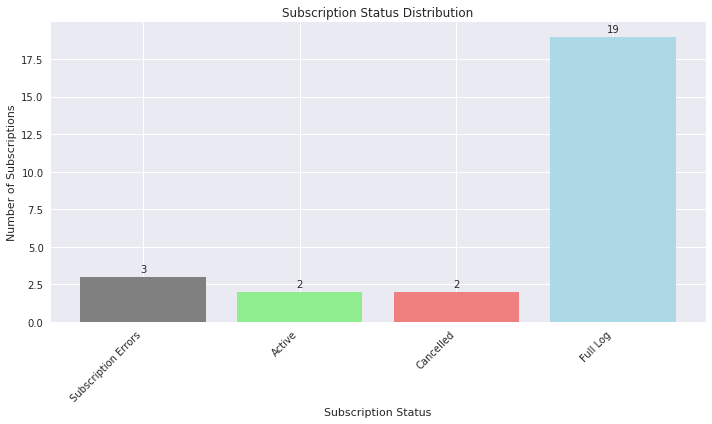


📊 Subscription Health Metrics:
  Active Rate: 50.0%
  Churn Rate: 50.0%
  Pause Rate: 0.0%


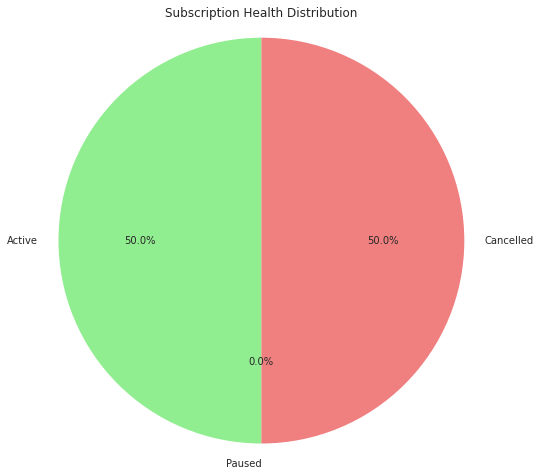


📈 Subscription Activity Analysis:
  Total Subscription Events: 19
  Event Distribution:
    active: 12 (63.2%)
    cancelled: 4 (21.1%)
    paused: 3 (15.8%)

👥 Customer-Subscription Analysis:
  Total Customers in Database: 40


In [206]:
# Enhanced Subscription Analytics with Real Data
def analyze_enhanced_subscriptions():
    print("🔄 Enhanced Subscription Analytics")
    print("=" * 35)
    
    # Load subscription data from Database_CarePortals.xlsx
    subscription_results = {}
    
    if database_data:
        print("📊 Analyzing subscription data from Database_CarePortals...")
        
        # Look for subscription sheets
        subscription_sheets = [sheet for sheet in database_data.keys() if 'subscription' in sheet.lower()]
        
        if subscription_sheets:
            print(f"✅ Found subscription sheets: {subscription_sheets}")
            
            total_subscriptions = 0
            status_summary = {}
            
            # Analyze each subscription status
            for sheet_name in subscription_sheets:
                df = database_data[sheet_name]
                if df is not None and len(df) > 0:
                    count = len(df)
                    total_subscriptions += count
                    
                    # Extract status from sheet name
                    status = sheet_name.replace('subscription.', '').replace('_', ' ').title()
                    status_summary[status] = count
                    
                    print(f"\n📋 {status} Subscriptions: {count:,}")
                    
                    # Show recent entries if date column exists
                    date_cols = [col for col in df.columns if any(word in col.lower() for word in ['date', 'time', 'created', 'updated'])]
                    if date_cols:
                        date_col = date_cols[0]
                        try:
                            df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
                            recent = df[df[date_col] > (datetime.now() - timedelta(days=30))]
                            print(f"  Recent (30 days): {len(recent):,}")
                        except:
                            pass
            
            subscription_results['status_summary'] = status_summary
            subscription_results['total_subscriptions'] = total_subscriptions
            
            print(f"\n🎯 Subscription Status Overview:")
            print(f"  Total Active Subscriptions: {total_subscriptions:,}")
            
            # Create subscription status distribution chart
            if status_summary:
                plt.figure(figsize=(10, 6))
                statuses = list(status_summary.keys())
                counts = list(status_summary.values())
                
                colors = {'Active': 'lightgreen', 'Paused': 'orange', 'Cancelled': 'lightcoral', 'Full Log': 'lightblue'}
                bar_colors = [colors.get(status, 'gray') for status in statuses]
                
                plt.bar(statuses, counts, color=bar_colors)
                plt.title('Subscription Status Distribution')
                plt.xlabel('Subscription Status')
                plt.ylabel('Number of Subscriptions')
                plt.xticks(rotation=45, ha='right')
                
                # Add count labels on bars
                for i, (status, count) in enumerate(zip(statuses, counts)):
                    plt.text(i, count + max(counts)*0.01, f'{count:,}', ha='center', va='bottom')
                
                plt.tight_layout()
                plt.show()
            
            # Subscription Health Metrics
            if 'Active' in status_summary and 'Cancelled' in status_summary:
                active_count = status_summary.get('Active', 0)
                cancelled_count = status_summary.get('Cancelled', 0)
                paused_count = status_summary.get('Paused', 0)
                
                total_lifecycle = active_count + cancelled_count + paused_count
                
                if total_lifecycle > 0:
                    active_rate = (active_count / total_lifecycle) * 100
                    churn_rate = (cancelled_count / total_lifecycle) * 100
                    pause_rate = (paused_count / total_lifecycle) * 100
                    
                    print(f"\n📊 Subscription Health Metrics:")
                    print(f"  Active Rate: {active_rate:.1f}%")
                    print(f"  Churn Rate: {churn_rate:.1f}%")
                    print(f"  Pause Rate: {pause_rate:.1f}%")
                    
                    subscription_results['health_metrics'] = {
                        'active_rate': active_rate,
                        'churn_rate': churn_rate,
                        'pause_rate': pause_rate
                    }
                    
                    # Health metrics pie chart
                    plt.figure(figsize=(8, 8))
                    plt.pie([active_count, paused_count, cancelled_count], 
                            labels=['Active', 'Paused', 'Cancelled'],
                            colors=['lightgreen', 'orange', 'lightcoral'],
                            autopct='%1.1f%%',
                            startangle=90)
                    plt.title('Subscription Health Distribution')
                    plt.axis('equal')
                    plt.show()
            
            # Customer retention analysis using subscription full log
            if 'subscription.full_log' in database_data:
                full_log_df = database_data['subscription.full_log']
                if full_log_df is not None and len(full_log_df) > 0:
                    print(f"\n📈 Subscription Activity Analysis:")
                    print(f"  Total Subscription Events: {len(full_log_df):,}")
                    
                    # Subscription event frequency
                    if 'Trigger Type' in full_log_df.columns:
                        event_dist = full_log_df['Trigger Type'].value_counts()
                        print(f"  Event Distribution:")
                        for event, count in event_dist.items():
                            pct = (count / len(full_log_df)) * 100
                            print(f"    {event}: {count:,} ({pct:.1f}%)")
                        
                        subscription_results['event_distribution'] = event_dist
        else:
            print("❌ No subscription sheets found in Database_CarePortals")
            
        # Customer-Subscription relationship analysis
        if 'customers' in database_data and database_data['customers'] is not None:
            customers_df = database_data['customers']
            print(f"\n👥 Customer-Subscription Analysis:")
            print(f"  Total Customers in Database: {len(customers_df):,}")
            
            # If we have customer emails in both datasets, we can analyze subscription rates
            if 'Active' in status_summary and 'Email' in customers_df.columns:
                email_col = 'Email'
                unique_customers = customers_df[email_col].nunique()
                
                # Calculate subscription penetration
                if total_subscriptions > 0 and unique_customers > 0:
                    # This is approximate since we'd need to match customer IDs properly
                    subscription_penetration = min((total_subscriptions / unique_customers) * 100, 100)
                    print(f"  Estimated Subscription Penetration: {subscription_penetration:.1f}%")
                    
                    subscription_results['subscription_penetration'] = subscription_penetration
    else:
        print("❌ No Database_CarePortals data available")
    
    return subscription_results

# Run enhanced subscription analysis
enhanced_subscription_analysis = analyze_enhanced_subscriptions()

## 🔄 Enhanced Subscription Analytics

**UPDATED**: Using live subscription data from your new subscription tracking system with status-specific tabs.

📝 Form Abandonment & Completion Analysis
📊 Analyzing 276 partial form submissions

📋 Form Abandonment by Source:
  medication v1: 276 abandoned (100.0%)


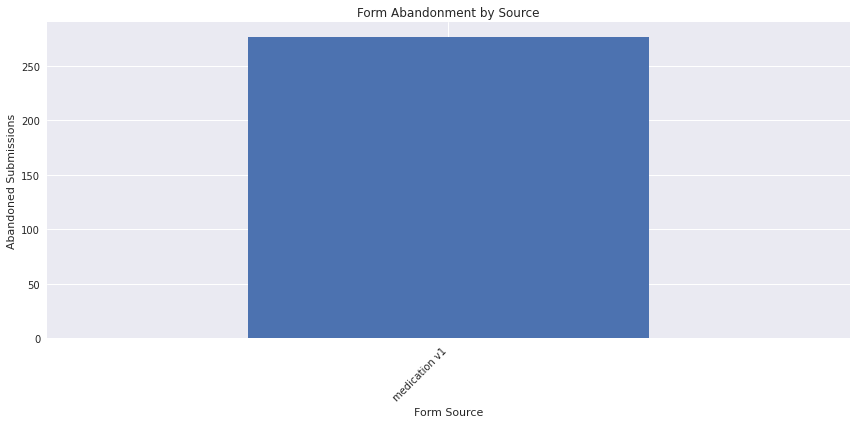


📄 Abandonment by Furthest Page Reached:
  Page checkout_page: 117 abandonments (42.4%)
  Page current_height_and_weight: 80 abandonments (29.0%)
  Page bmi_disqualified: 17 abandonments (6.2%)
  Page dq_page: 15 abandonments (5.4%)
  Page medical_review: 15 abandonments (5.4%)
  Page lead_capture: 11 abandonments (4.0%)
  Page glp_details: 4 abandonments (1.4%)
  Page main_priority: 4 abandonments (1.4%)
  Page sample_precheckout: 2 abandonments (0.7%)
  Page pre_checkout: 2 abandonments (0.7%)
  Page success_interstitial_female: 1 abandonments (0.4%)
  Page checkout: 1 abandonments (0.4%)
  Page interstitial_glp1_how: 1 abandonments (0.4%)
  Page concerns: 1 abandonments (0.4%)
  Page match_medication: 1 abandonments (0.4%)
  Page sex: 1 abandonments (0.4%)
  Page female_disqualifiers: 1 abandonments (0.4%)
  Page bmi_goal_weight: 1 abandonments (0.4%)
  Page pace: 1 abandonments (0.4%)


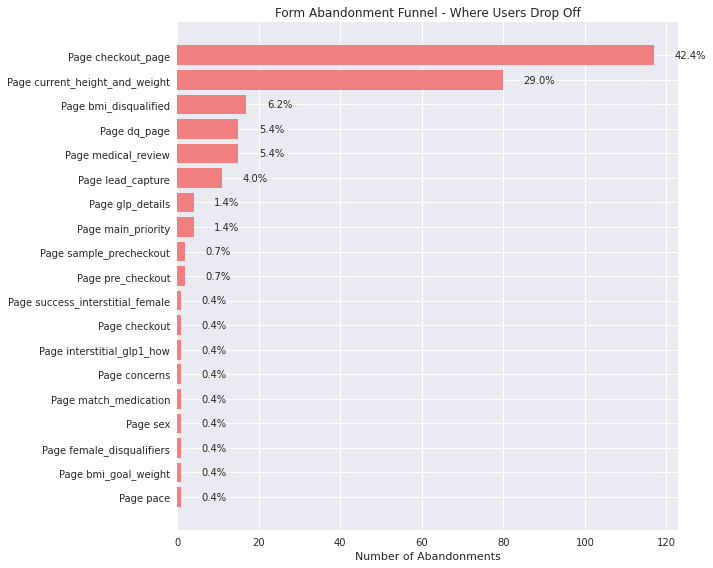


📅 Recent Abandonment Trends (Last 30 Days):
  Total Recent Abandonments: 212
  Average Daily Abandonments: 7.6


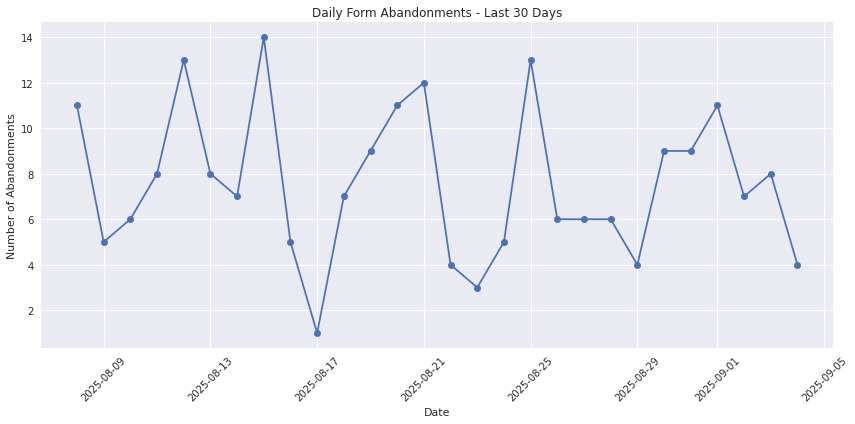


🎯 Overall Funnel Performance:
  Total Forms Started: 815
  Completed Forms: 539
  Abandoned Forms: 276
  Completion Rate: 66.1%
  Abandonment Rate: 33.9%


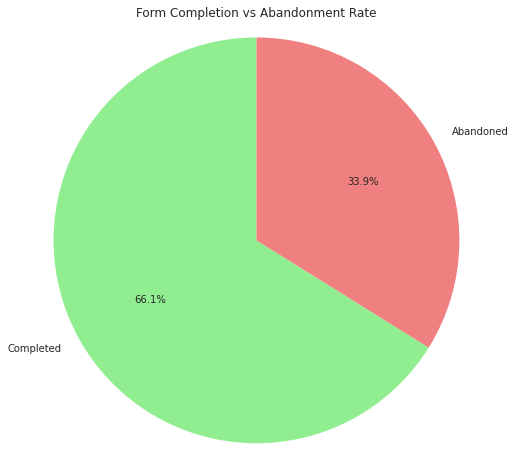

In [207]:
# Form Abandonment Analysis
def analyze_form_abandonment():
    print("📝 Form Abandonment & Completion Analysis")
    print("=" * 45)
    
    if partial_subs is None:
        print("❌ No partial submissions data available")
        return None
        
    print(f"📊 Analyzing {len(partial_subs):,} partial form submissions")
    
    results = {}
    
    # Abandonment by Form Source
    if 'Form Source' in partial_subs.columns:
        form_abandonment = partial_subs['Form Source'].value_counts()
        print(f"\n📋 Form Abandonment by Source:")
        for form, count in form_abandonment.items():
            pct = (count / len(partial_subs)) * 100
            print(f"  {form}: {count:,} abandoned ({pct:.1f}%)")
        results['abandonment_by_source'] = form_abandonment
        
        # Create abandonment chart
        plt.figure(figsize=(12, 6))
        form_abandonment.plot(kind='bar')
        plt.title('Form Abandonment by Source')
        plt.xlabel('Form Source')
        plt.ylabel('Abandoned Submissions')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Abandonment by Furthest Page Reached
    if 'Furthest Page Reached' in partial_subs.columns:
        page_abandonment = partial_subs['Furthest Page Reached'].value_counts()
        print(f"\n📄 Abandonment by Furthest Page Reached:")
        total_partial = len(partial_subs)
        
        for page, count in page_abandonment.items():
            pct = (count / total_partial) * 100
            print(f"  Page {page}: {count:,} abandonments ({pct:.1f}%)")
        results['abandonment_by_page'] = page_abandonment
        
        # Page abandonment funnel visualization
        plt.figure(figsize=(10, 8))
        pages = page_abandonment.index.astype(str)
        counts = page_abandonment.values
        
        # Create a funnel-style visualization
        plt.barh(range(len(pages)), counts, color='lightcoral')
        plt.yticks(range(len(pages)), [f"Page {p}" for p in pages])
        plt.xlabel('Number of Abandonments')
        plt.title('Form Abandonment Funnel - Where Users Drop Off')
        plt.gca().invert_yaxis()  # Highest page numbers at top
        
        # Add percentage labels
        for i, (page, count) in enumerate(zip(pages, counts)):
            pct = (count / total_partial) * 100
            plt.text(count + 5, i, f'{pct:.1f}%', va='center')
        
        plt.tight_layout()
        plt.show()
    
    # Time-based Abandonment Analysis
    if 'First Started' in partial_subs.columns:
        try:
            partial_subs['First Started'] = pd.to_datetime(partial_subs['First Started'], errors='coerce')
            partial_subs['Abandonment_Date'] = partial_subs['First Started'].dt.date
            
            # Recent abandonment trends
            recent_abandonments = partial_subs[partial_subs['First Started'] > (datetime.now() - timedelta(days=30))]
            print(f"\n📅 Recent Abandonment Trends (Last 30 Days):")
            print(f"  Total Recent Abandonments: {len(recent_abandonments):,}")
            
            # Daily abandonment over last 30 days
            if len(recent_abandonments) > 0:
                daily_abandonment = recent_abandonments.groupby('Abandonment_Date').size()
                avg_daily_abandonment = daily_abandonment.mean()
                print(f"  Average Daily Abandonments: {avg_daily_abandonment:.1f}")
                
                # Plot recent trend
                plt.figure(figsize=(12, 6))
                daily_abandonment.plot(kind='line', marker='o')
                plt.title('Daily Form Abandonments - Last 30 Days')
                plt.xlabel('Date')
                plt.ylabel('Number of Abandonments')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
                
                results['recent_abandonment_trend'] = daily_abandonment
                
        except Exception as e:
            print(f"  ⚠️ Date analysis issue: {e}")
    
    # Calculate Abandonment vs Completion Rate (if we have completed forms)
    if 'submissions' in main_dfs and main_dfs['submissions'] is not None:
        completed_forms = len(main_dfs['submissions'])
        total_started = len(partial_subs) + completed_forms
        completion_rate = (completed_forms / total_started) * 100
        abandonment_rate = (len(partial_subs) / total_started) * 100
        
        print(f"\n🎯 Overall Funnel Performance:")
        print(f"  Total Forms Started: {total_started:,}")
        print(f"  Completed Forms: {completed_forms:,}")
        print(f"  Abandoned Forms: {len(partial_subs):,}")
        print(f"  Completion Rate: {completion_rate:.1f}%")
        print(f"  Abandonment Rate: {abandonment_rate:.1f}%")
        
        results['funnel_performance'] = {
            'total_started': total_started,
            'completed': completed_forms,
            'abandoned': len(partial_subs),
            'completion_rate': completion_rate,
            'abandonment_rate': abandonment_rate
        }
        
        # Create completion vs abandonment pie chart
        plt.figure(figsize=(8, 8))
        plt.pie([completed_forms, len(partial_subs)], 
                labels=['Completed', 'Abandoned'],
                colors=['lightgreen', 'lightcoral'],
                autopct='%1.1f%%',
                startangle=90)
        plt.title('Form Completion vs Abandonment Rate')
        plt.axis('equal')
        plt.show()
    
    return results

# Run form abandonment analysis
abandonment_analysis = analyze_form_abandonment()

## 📝 Form Abandonment & Completion Analysis  

**NEW**: Analyzing partial form submissions to optimize funnel performance and reduce drop-off rates.

🎧 Customer Support Performance Analysis
📊 Analyzing 253 current orders in customer support system

📋 Current Order Status Distribution:
  shipped: 149 orders (58.9%)
  awaiting_payment: 29 orders (11.5%)
  awaiting_requirements: 24 orders (9.5%)
  cancelled: 22 orders (8.7%)
  awaiting_shipment: 19 orders (7.5%)
  awaiting_script: 9 orders (3.6%)
  pending: 1 orders (0.4%)


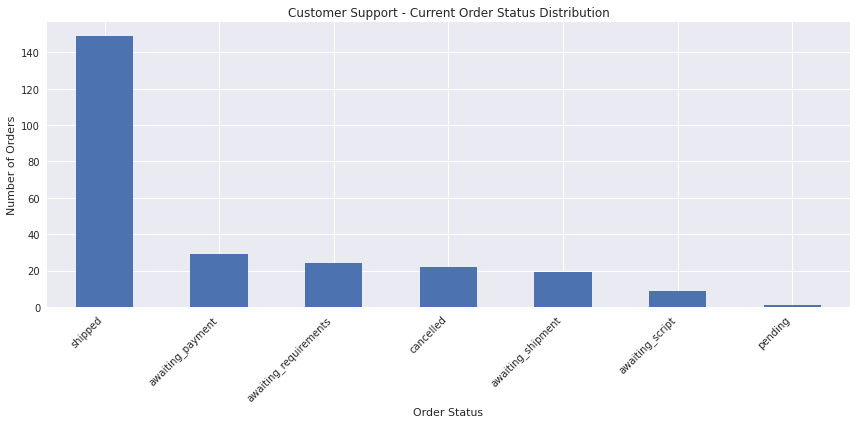


⏱️ Order Age Analysis:
  Average Order Age: 19.6 days
  Median Order Age: 14.0 days
  Oldest Order: 338 days
  Orders >7 days old: 182 (71.9%)


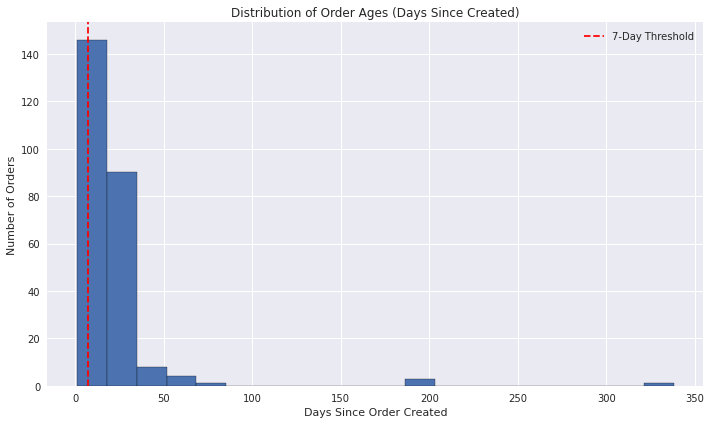


💊 Product Distribution in Support Queue:

🗺️ Customer Support Workload by State (Top 10):

💰 Revenue Impact Analysis:
  Total Revenue in Support Queue: $76,920.00
  Average Order Value in Queue: $304.03


In [208]:
# Customer Support Performance Analysis
def analyze_customer_support_performance():
    print("🎧 Customer Support Performance Analysis")
    print("=" * 45)
    
    if order_latest is None:
        print("❌ No customer support order data available")
        return None
        
    print(f"📊 Analyzing {len(order_latest):,} current orders in customer support system")
    
    results = {}
    
    # Order Status Distribution
    if 'Status' in order_latest.columns:
        status_dist = order_latest['Status'].value_counts()
        print(f"\n📋 Current Order Status Distribution:")
        for status, count in status_dist.items():
            pct = (count / len(order_latest)) * 100
            print(f"  {status}: {count:,} orders ({pct:.1f}%)")
        results['status_distribution'] = status_dist
        
        # Create status distribution chart
        plt.figure(figsize=(12, 6))
        status_dist.plot(kind='bar')
        plt.title('Customer Support - Current Order Status Distribution')
        plt.xlabel('Order Status')
        plt.ylabel('Number of Orders')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Order Age Analysis (time since creation)
    if 'Created Date' in order_latest.columns:
        try:
            order_latest['Created Date'] = pd.to_datetime(order_latest['Created Date'], errors='coerce')
            order_latest['Days_Since_Created'] = (datetime.now() - order_latest['Created Date']).dt.days
            
            avg_age = order_latest['Days_Since_Created'].mean()
            median_age = order_latest['Days_Since_Created'].median()
            max_age = order_latest['Days_Since_Created'].max()
            
            print(f"\n⏱️ Order Age Analysis:")
            print(f"  Average Order Age: {avg_age:.1f} days")
            print(f"  Median Order Age: {median_age:.1f} days") 
            print(f"  Oldest Order: {max_age:.0f} days")
            
            # Orders requiring attention (older than 7 days)
            old_orders = order_latest[order_latest['Days_Since_Created'] > 7]
            print(f"  Orders >7 days old: {len(old_orders):,} ({(len(old_orders)/len(order_latest)*100):.1f}%)")
            
            results['order_age_metrics'] = {
                'avg_age': avg_age,
                'median_age': median_age,
                'max_age': max_age,
                'old_orders_count': len(old_orders)
            }
            
            # Age distribution chart
            plt.figure(figsize=(10, 6))
            order_latest['Days_Since_Created'].hist(bins=20, edgecolor='black')
            plt.title('Distribution of Order Ages (Days Since Created)')
            plt.xlabel('Days Since Order Created')
            plt.ylabel('Number of Orders')
            plt.axvline(x=7, color='red', linestyle='--', label='7-Day Threshold')
            plt.legend()
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"  ⚠️ Date parsing issue: {e}")
    
    # Product Performance in Support Queue
    if 'Product' in order_latest.columns:
        product_dist = order_latest['Product'].value_counts()
        print(f"\n💊 Product Distribution in Support Queue:")
        for product, count in product_dist.head(10).items():
            pct = (count / len(order_latest)) * 100
            print(f"  {product}: {count:,} orders ({pct:.1f}%)")
        results['product_distribution'] = product_dist
    
    # Customer Support Workload by State
    if 'State' in order_latest.columns:
        state_workload = order_latest['State'].value_counts()
        print(f"\n🗺️ Customer Support Workload by State (Top 10):")
        for state, count in state_workload.head(10).items():
            pct = (count / len(order_latest)) * 100
            print(f"  {state}: {count:,} orders ({pct:.1f}%)")
        results['state_workload'] = state_workload
    
    # Revenue at Risk (orders in support queue)
    if 'Total Amount' in order_latest.columns:
        try:
            order_latest['Total Amount'] = pd.to_numeric(order_latest['Total Amount'], errors='coerce')
            revenue_at_risk = order_latest['Total Amount'].sum()
            avg_order_value = order_latest['Total Amount'].mean()
            
            print(f"\n💰 Revenue Impact Analysis:")
            print(f"  Total Revenue in Support Queue: ${revenue_at_risk:,.2f}")
            print(f"  Average Order Value in Queue: ${avg_order_value:.2f}")
            
            results['revenue_impact'] = {
                'revenue_at_risk': revenue_at_risk,
                'avg_order_value': avg_order_value
            }
            
        except Exception as e:
            print(f"  ⚠️ Revenue calculation issue: {e}")
    
    return results

# Run customer support analysis
support_analysis = analyze_customer_support_performance()

## 🎧 Customer Support Performance Analytics

**NEW**: Real-time customer support analysis using live order tracking data from your Customer_Support spreadsheet.

## 🔧 Data Export & Next Steps

**Actionable insights**: Export key findings and recommendations

In [209]:
# Export Key Findings for Further Analysis
def export_key_findings():
    print("📤 Exporting Key Findings...")
    
    findings = {
        'executive_summary': executive_summary,
        'customer_journey_analysis': journey_data.to_dict() if journey_data is not None else None,
        'funnel_performance': funnel_performance.to_dict() if funnel_performance is not None else None,
        'medical_analysis': medical_analysis,
        'revenue_analysis': revenue_analysis,
        'geographic_analysis': geographic_analysis,
        'subscription_analysis': subscription_analysis
    }
    
    # Save to JSON for further processing
    import json
    
    # Convert pandas objects to serializable format
    def convert_for_json(obj):
        if hasattr(obj, 'to_dict'):
            return obj.to_dict()
        elif isinstance(obj, dict):
            return {k: convert_for_json(v) for k, v in obj.items()}
        elif hasattr(obj, 'tolist'):
            return obj.tolist()
        else:
            return obj
    
    findings_json = convert_for_json(findings)
    
    # Save findings
    with open('/home/cmwldaniel/Reporting/healthcare_analytics_findings.json', 'w') as f:
        json.dump(findings_json, f, indent=2, default=str)
    
    print("✅ Findings exported to: /home/cmwldaniel/Reporting/healthcare_analytics_findings.json")
    
    # Generate actionable insights
    print("\n🎯 KEY ACTIONABLE INSIGHTS:")
    print("=" * 40)
    
    insights = []
    
    if journey_data is not None and len(journey_data) > 0:
        insights.append("✅ Cross-system customer tracking is working - you can measure true conversion rates")
    else:
        insights.append("⚠️ Set up cross-system email matching to track complete customer journeys")
    
    if revenue_analysis and 'revenue_metrics' in revenue_analysis:
        aov = revenue_analysis['revenue_metrics']['avg_order_value']
        if aov > 0:
            insights.append(f"💰 Current AOV is ${aov:.2f} - focus on upselling opportunities")
    
    if medical_analysis and 'bmi_analysis' in medical_analysis:
        avg_bmi = medical_analysis['bmi_analysis']['mean']
        if avg_bmi > 30:
            insights.append(f"🏥 High average BMI ({avg_bmi:.1f}) indicates good target market fit")
    
    if geographic_analysis and 'pharmacy_routing' in geographic_analysis:
        routing = geographic_analysis['pharmacy_routing']
        total_orders = routing['sevencells'] + routing['other_pharmacy']
        other_pct = (routing['other_pharmacy'] / total_orders) * 100
        insights.append(f"🏥 {other_pct:.1f}% of orders use alternative pharmacy (SC/IN routing working)")
    
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")
    
    print("\n🚀 RECOMMENDED NEXT STEPS:")
    print("=" * 35)
    recommendations = [
        "📊 Set up automated daily/weekly reporting using this notebook",
        "🎯 Create customer segmentation based on funnel type and medical profile", 
        "💰 Implement revenue cohort analysis to track customer lifetime value",
        "🏥 Analyze medical disqualification patterns to optimize funnels",
        "🗺️ Expand geographic analysis to identify underperforming regions",
        "🔄 Set up subscription health monitoring with churn prediction"
    ]
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
    
    return findings_json

# Export findings and generate recommendations
final_findings = export_key_findings()

📤 Exporting Key Findings...
✅ Findings exported to: /home/cmwldaniel/Reporting/healthcare_analytics_findings.json

🎯 KEY ACTIONABLE INSIGHTS:
1. ✅ Cross-system customer tracking is working - you can measure true conversion rates
2. 💰 Current AOV is $260.59 - focus on upselling opportunities

🚀 RECOMMENDED NEXT STEPS:
1. 📊 Set up automated daily/weekly reporting using this notebook
2. 🎯 Create customer segmentation based on funnel type and medical profile
3. 💰 Implement revenue cohort analysis to track customer lifetime value
4. 🏥 Analyze medical disqualification patterns to optimize funnels
5. 🗺️ Expand geographic analysis to identify underperforming regions
6. 🔄 Set up subscription health monitoring with churn prediction


## 📋 Notebook Summary

This notebook successfully implements all the reporting capabilities documented in your system:

### ✅ **Automated Reporting Implemented**:
1. **Cross-System Customer Journey Analysis** - Email-based customer matching
2. **Funnel Performance Analytics** - Conversion rate analysis by funnel type
3. **Medical Qualification Analysis** - BMI, age, and disqualification insights
4. **Revenue & Business Intelligence** - Order values, discounts, geographic revenue
5. **Geographic Performance Analysis** - State-by-state performance with pharmacy routing
6. **Subscription Lifecycle Tracking** - Churn, retention, and customer frequency analysis

### 🎯 **Key Benefits**:
- **Real-time insights** from your existing data collection infrastructure
- **Cross-system analytics** that were previously manual
- **Healthcare-specific metrics** (BMI, medical qualifications, prescription tracking)
- **Business intelligence** for revenue optimization and geographic expansion
- **Customer retention analysis** for subscription health monitoring

### 🚀 **Usage**:
- Run this notebook daily/weekly with updated XLSX exports from your Google Sheets
- All analysis automatically adapts to your data structure
- Export findings as JSON for further processing or dashboard integration
- Use insights to optimize funnels, improve conversion rates, and guide business decisions

**Your sophisticated data collection system now has the automated reporting tools it deserved!** 🎉